# Introduction to our Dataset

##### Craigslist is the world's largest collection of used vehicles for sale.We built a scraper for a project to create this dataset which includes every used vehicle entry within the United States on Craigslist.


#### it contains almost all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories

# Task

#### Perform an analysis to see how each column correlates with the price and work recommendation of the most popular and best-selling cars

# Definitions:

### *Manufacturer:
    is vehicle manufacturer like BMW ,Mercedes-benz,Hyundai ,KIA ,...
### *Model :
    refer to the model of the vehicle ,where every manufacturer made many model. 
        ex:c-class c 300 and glc 300 sport are two model for Mercedes-benz.
### *Condition:
    *Excellent: This means that the vehicle looks new and in excellent mechanical condition.
    *Very good: This means that the vehicle has minor cosmetic defects and excellent mechanical condition.
    *Good: This means that the vehicle has some repairable cosmetic defects and is free of major mechanical problems.
    *Fair: This means that the vehicle has some cosmetic defects that require repair and/or replacement.
    for more detailes chick this <a href ="https://www.facebook.com/business/help/979881538883930"></a> .
### *Cylinders:
    this term specify to the engine ,every engine has a number of cylinders :3,4,6,8,10 and 12 cylinders ,
    actaully this term plays an main role for power engine.
### *Fuel:
    the type of fuel the vehicle need like gas, diesel , hybrid , electric or some thing else.
### *Odometer:
    is an instrument used for measuring the distance traveled by a vehicle.
### *Title_status:
    Vehicle ownership status record such that clean means The vehicle has a clean ownership record.
### *Transmission:
    vehicle transmission type either automatic or manual.
### *VIN:
    Vehicle Identifiction Number is a unique number for a vehicle.
### *Drive:
    is the drive system and there is 4 systems they are Front-Wheel Drive (fwd),Rear-Wheel Drive (rwd) , Four-Wheel Drive 4x4 (4wd) and All-Wheel Drive,for more details in the defrences between them chick this <a href="https://www.wallacechev.com/blog/whats-the-difference-between-fwd-rwd-awd-and-4wd/">wallacechev</a>
### *Size:
    vehicles size either mid-size, full-size, sub-compact or compact ,their is a defrences between them you can see this from as example of honda cars <a href="https://www.buerklehonda.com/news/differences-between-subcompact-compact-midsize-and-full-size-cars/">honda</a>
### *Type:
    describe the type of vehicles like 
            pickup <img src="D:\level 4\Data science\project\img\truck.png">
            coupe<img src="D:\level 4\Data science\project\img\coupe.png">
            SUV<img src="D:\level 4\Data science\project\img\suv.png"> 
            mini-van<img src="D:\level 4\Data science\project\img\minivan.png"> 
            hatchback<img src="D:\level 4\Data science\project\img\hatchback.png">  
            sedan<img src="D:\level 4\Data science\project\img\sedan.png">  
            convertible<img src="D:\level 4\Data science\project\img\convertible.png"> 
            wagon <img  src="D:\level 4\Data science\project\img\wagon.png"> 
            offroad<img src="D:\level 4\Data science\project\img\offroad.png"> or other.
    

# Importing the Libraries

In [1]:
# For preparing and preproccing Data 
import pandas as pd
import numpy as np 

# For Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap

# For Modeling 
from sklearn.linear_model import LinearRegression , SGDRegressor , RidgeCV  , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,  mean_squared_error , median_absolute_error
from sklearn.preprocessing import StandardScaler , LabelEncoder

import warnings 
warnings.filterwarnings("ignore")

# Preparing and Descriping data

In [2]:
# Uploading data
dataSet= pd.read_csv(r'Cars.csv')


In [3]:
# desciping the shape of data (number of rows , number of columns)
dataSet.shape

(426880, 26)

number of rows = 426880 <br>
number of columns = 26

In [4]:
# Determining the Features of our data set 
pd.DataFrame(dataSet.columns , columns=['Features'])

,Features
0,id
1,url
2,region
3,region_url
4,price
5,year
6,manufacturer
7,model
8,condition
9,cylinders


In [5]:
# The first 10 rows of the dataset
dataSet.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,6 cylinders,...,full-size,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [6]:
# The last 10 rows of the dataset
dataSet.tail(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
426870,7301592119,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,22990,2020.0,hyundai,sonata se sedan 4d,good,6 cylinders,...,full-size,sedan,blue,https://images.craigslist.org/00u0u_eRGgkSql5l...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:40:17-0600
426871,7301591639,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,17990,2018.0,kia,sportage lx sport utility 4d,good,6 cylinders,...,full-size,SUV,NaN,https://images.craigslist.org/00U0U_4VvCQuqnfb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:30:20-0600
426872,7301591201,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32590,2020.0,mercedes-benz,c-class c 300,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00808_bYj0inoZ58...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426873,7301591202,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30990,2018.0,mercedes-benz,glc 300 sport,good,6 cylinders,...,full-size,other,white,https://images.craigslist.org/00Q0Q_9VUbj91fKb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426874,7301591199,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00I0I_hJHfjCUppa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,full-size,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,...,full-size,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,...,full-size,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,full-size,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2019.0,bmw,4 series 430i gran coupe,good,6 cylinders,...,full-size,coupe,NaN,https://images.craigslist.org/00Y0Y_lEUocjyRxa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [135]:
# Cleaning  the unnecessary columns 
dataSet= dataSet.drop(columns=['region','id','url', 'region_url', 'VIN', 'image_url', 'description','county' ,'lat' ,'long','year'], axis=1)

In [136]:
# Descriping the data type of each column 
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371918 entries, 96564 to 169314
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         371918 non-null  int64  
 1   manufacturer  371918 non-null  int32  
 2   condition     371918 non-null  int32  
 3   cylinders     371918 non-null  int32  
 4   fuel          371918 non-null  int32  
 5   odometer      371918 non-null  float64
 6   title_status  371918 non-null  int32  
 7   transmission  371918 non-null  int32  
 8   drive         371918 non-null  int32  
 9   size          371918 non-null  int32  
 10  type          371918 non-null  int32  
 11  paint_color   371918 non-null  int32  
 12  state         371918 non-null  int32  
 13  age           371918 non-null  float64
dtypes: float64(2), int32(11), int64(1)
memory usage: 35.0 MB


In [9]:
# Descriping the values in each clumns 
dataSet=dataSet.sort_values(by='year' , ascending=True)
for col in (dataSet[['year','manufacturer','model','price','condition' , 'cylinders' , 'fuel' ,'title_status', 'transmission' , 'drive' ,'size', 'type' ,'paint_color' ,'state' ]])  :
        print('Feature : ' , col)
        print(dataSet[col].unique())
        print('------------------------------------------------------------------------')

Feature :  year
[1900. 1901. 1902. 1903. 1905. 1909. 1910. 1913. 1915. 1916. 1918. 1920.
 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932.
 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944.
 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956.
 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968.
 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980.
 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992.
 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.   nan]
------------------------------------------------------------------------
Feature :  manufacturer
['ford' nan 'dodge' 'acura' 'chevrolet' 'cadillac' 'buick' 'chrysler'
 'pontiac' 'lincoln' 'mercedes-benz' 'gmc' 'jaguar' 'mercury' 'jeep' 'ram'
 'ferrari' 'volkswagen' 'porsche' 'bmw' '

In [10]:
# Removing unreal data (price = 0) 
dataSet=dataSet[dataSet['price']!=0]
dataSet.shape

(393985, 18)

In [11]:
# most apperance value in each column
for col in (dataSet.columns) :
    print('Feature : ' ,col)
    print('Most apperrance (mode) :' ,dataSet[col].mode())
    print('-------------------------')

Feature :  price
Most apperrance (mode) : 0    6995
dtype: int64
-------------------------
Feature :  year
Most apperrance (mode) : 0    2018.0
dtype: float64
-------------------------
Feature :  manufacturer
Most apperrance (mode) : 0    ford
dtype: object
-------------------------
Feature :  model
Most apperrance (mode) : 0    f-150
dtype: object
-------------------------
Feature :  condition
Most apperrance (mode) : 0    good
dtype: object
-------------------------
Feature :  cylinders
Most apperrance (mode) : 0    6 cylinders
dtype: object
-------------------------
Feature :  fuel
Most apperrance (mode) : 0    gas
dtype: object
-------------------------
Feature :  odometer
Most apperrance (mode) : 0    100000.0
dtype: float64
-------------------------
Feature :  title_status
Most apperrance (mode) : 0    clean
dtype: object
-------------------------
Feature :  transmission
Most apperrance (mode) : 0    automatic
dtype: object
-------------------------
Feature :  drive
Most apperran

###### Dealing with missing Values (NAN Values)


In [12]:
# Couning the number of NAN values in each column
dataSet.isna().sum()

price                0
year              1173
manufacturer     16185
model             4701
condition       151389
cylinders            0
fuel              2594
odometer          2290
title_status      7734
transmission      1823
drive                0
size                 0
type             85932
paint_color     117149
state                0
lat               3489
long              3489
posting_date        62
dtype: int64

In [13]:
# replcae missing values in columns that have varity of missing value with mode
dataSet["paint_color"].fillna('white', inplace = True)
dataSet["condition"].fillna('good', inplace = True)
dataSet["manufacturer"].fillna('clean', inplace = True)
dataSet["type"].fillna('sedan ', inplace = True)

In [14]:
# drop the other missing values
dataSet.dropna(inplace=True)

In [15]:
dataSet.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [16]:
# Shape after cleaning missing values
dataSet.shape 

(372367, 18)

###### Dealing with duplicated values

In [17]:
# Couning the number of duplicated rows  
dataSet.duplicated().sum()

383

In [18]:
# Removing the duplicated rows 
dataSet.drop_duplicates(inplace=True)

In [19]:
# Renaming and editing some feature 
dataSet["age"] = dataSet.year.apply(lambda x: int(2021-x))
#dataSet = dataSet.rename(columns={'year': 'age'})

In [20]:
# Removing unreal data (age < 0) 
dataSet=dataSet[dataSet['age']>=0]
dataSet['age'].astype('int64')

96564     121
123023    121
398032    121
154138    121
269472    121
         ... 
277781      0
59878       0
253009      0
145410      0
169314      0
Name: age, Length: 371918, dtype: int64

In [21]:
# Quick Descriptive Statistical for the numerical features
dataSet.describe()

,price,year,odometer,lat,long,age
count,3.719180e+05,371918.000000,3.719180e+05,371918.000000,371918.000000,371918.000000
mean,6.822432e+04,2011.074447,9.852070e+04,38.514844,-94.209451,9.925553
std,1.172118e+07,9.411010,1.958872e+05,5.861496,18.088852,9.411010
min,1.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728,0.000000
25%,7.000000e+03,2008.000000,3.800000e+04,34.628586,-110.891457,4.000000
50%,1.530000e+04,2013.000000,8.712600e+04,39.260000,-87.960000,8.000000
75%,2.785000e+04,2017.000000,1.359390e+05,42.410000,-80.740000,13.000000
max,3.736929e+09,2021.000000,1.000000e+07,82.252826,173.885502,121.000000


###### Dealing with Outliers

In [22]:
# Function for determine range of values using Tukey method
def Outlier_Bounds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25) # 1st quantile
    quartile3 = dataframe[variable].quantile(0.75) # 3rd quantile
    # Interquantile range 
    IQR = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * IQR
    low_limit = quartile1 - 1.5 * IQR
    return low_limit, up_limit

#Function for Determining the Outliers
def has_Outliers(dataframe, variable):
    lower_limit, upper_limit = Outlier_Bounds(dataframe, variable)
    if dataframe[(dataframe[variable] < lower_limit) | (dataframe[variable] > upper_limit)].any(axis=None):
        print(variable, "yes")
    else :    
        print(variable, "no")

In [23]:
# Checking if the numerical columns have outliers
for col in dataSet.loc[:,['price','odometer' , 'age'] ]:
    has_Outliers(dataSet, col)


price yes
odometer yes
age yes


<AxesSubplot:>

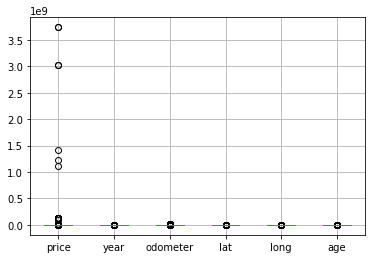

In [24]:
dataSet.boxplot()

There are alot of methods to deal with outliears , The most used are :

In [25]:
# If Outliers exist ,then :
def replace_with_Bounds(dataframe, variable) :
    lower_limit, upper_limit = Outlier_Bounds(dataframe, variable)
    dataframe.loc[(dataframe[variable])<lower_limit ,variable]=lower_limit
    dataframe.loc[(dataframe[variable])>upper_limit ,variable]=upper_limit
    
# Or
def replace_with_mean(dataframe, variable) :
    lower_limit, upper_limit = Outlier_Bounds(dataframe, variable)
    dataframe.loc[(dataframe[variable])<lower_limit ,variable]=dataframe[variable].mean()
    dataframe.loc[(dataframe[variable])>upper_limit ,variable]=dataframe[variable].mean()

In [26]:
# Replacing Outliers with upper&lower limits (maximum and minimum ) of the interquantile range 
for col in dataSet.loc[:,['price','odometer','age'] ]:
    replace_with_Bounds(dataSet, col)

# Checking again if the numerical columns have outliers 
for col in dataSet.loc[:,['price','odometer' ,'age'] ]:
    has_Outliers(dataSet, col)

price no
odometer no
age no


<AxesSubplot:>

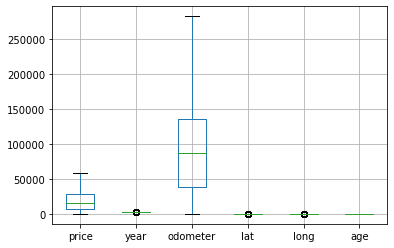

In [27]:
dataSet.boxplot()

In [30]:
dataSet

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date,age
96564,1,1900.0,ford,power wagon,good,6 cylinders,gas,2300.0,clean,other,awd,full-size,sedan,white,fl,26.497200,-81.824600,2021-04-10T08:28:31-0400,26.5
123023,4500,1900.0,clean,cushman white van,excellent,6 cylinders,gas,2136.0,clean,manual,awd,full-size,sedan,white,ga,33.796981,-84.643800,2021-05-01T08:34:38-0400,26.5
398032,500,1900.0,dodge,rampage,salvage,6 cylinders,gas,282847.5,clean,other,fwd,full-size,other,white,va,37.271493,-80.071237,2021-05-03T09:33:10-0400,26.5
154138,75,1900.0,clean,any and all,good,6 cylinders,other,10000.0,clean,other,awd,full-size,sedan,white,in,40.107919,-85.672715,2021-04-10T15:08:37-0400,26.5
269472,998,1900.0,clean,any,good,6 cylinders,other,123456.0,missing,other,awd,full-size,other,white,ny,42.955818,-76.904208,2021-04-05T08:20:41-0400,26.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277781,27918,2021.0,subaru,forester,new,6 cylinders,gas,4.0,clean,automatic,awd,full-size,SUV,white,ny,42.905975,-73.218064,2021-04-25T09:02:09-0400,0.0
59878,35990,2021.0,jeep,wrangler sport suv 2d,good,6 cylinders,gas,2600.0,clean,other,4wd,full-size,other,yellow,ca,33.779214,-84.411811,2021-04-30T07:01:08-0700,0.0
253009,10000,2021.0,honda,civic,good,6 cylinders,gas,100000.0,clean,other,awd,full-size,sedan,white,nj,39.999900,-74.222800,2021-04-09T16:54:23-0400,0.0
145410,539,2021.0,jeep,grand cherokee,good,6 cylinders,gas,11.0,clean,automatic,4wd,full-size,SUV,silver,il,42.325400,-89.170500,2021-04-05T18:01:51-0500,0.0


# Visualization

### Univariate 
A term describes a type of data that consists of observations on only a single attribute

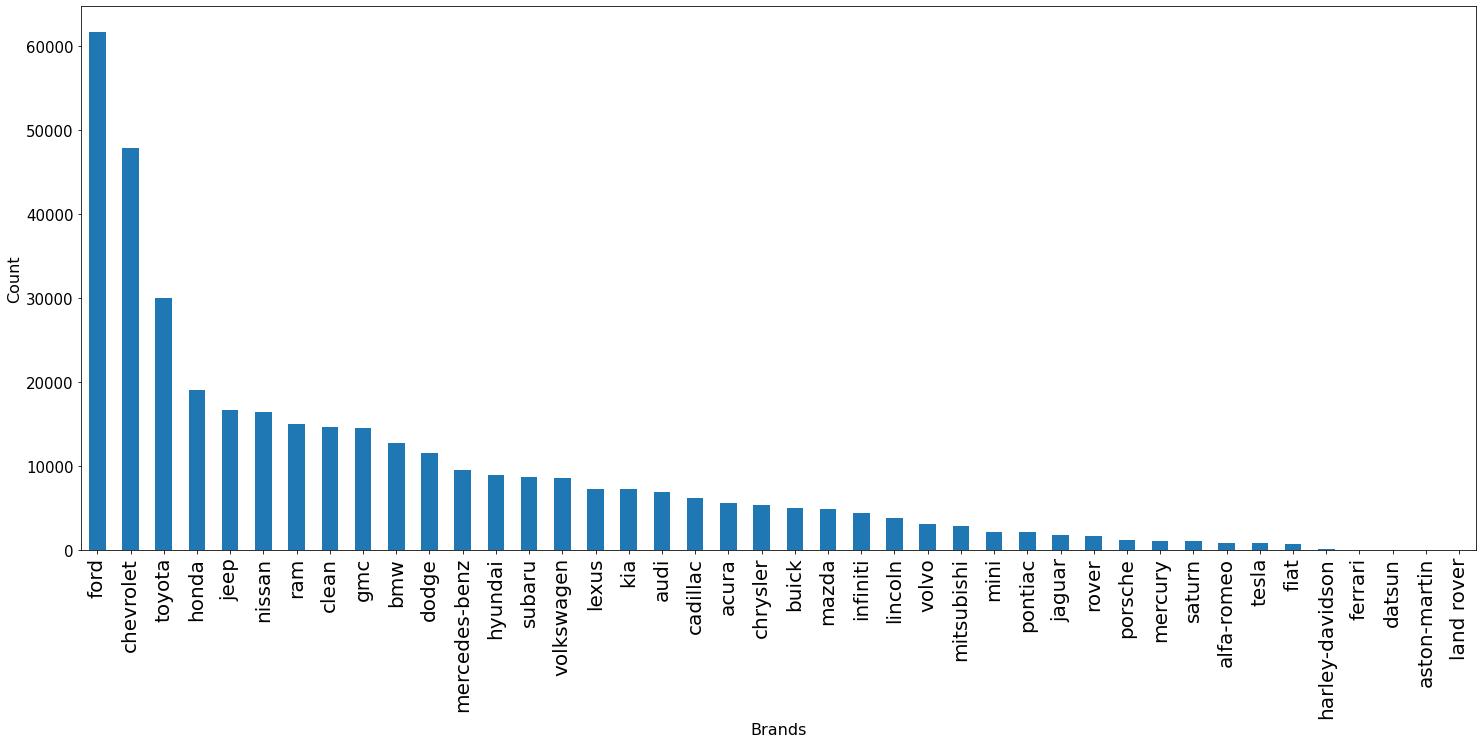

In [31]:
plt.figure(figsize=(25,10))
dataSet['manufacturer'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Brands', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);



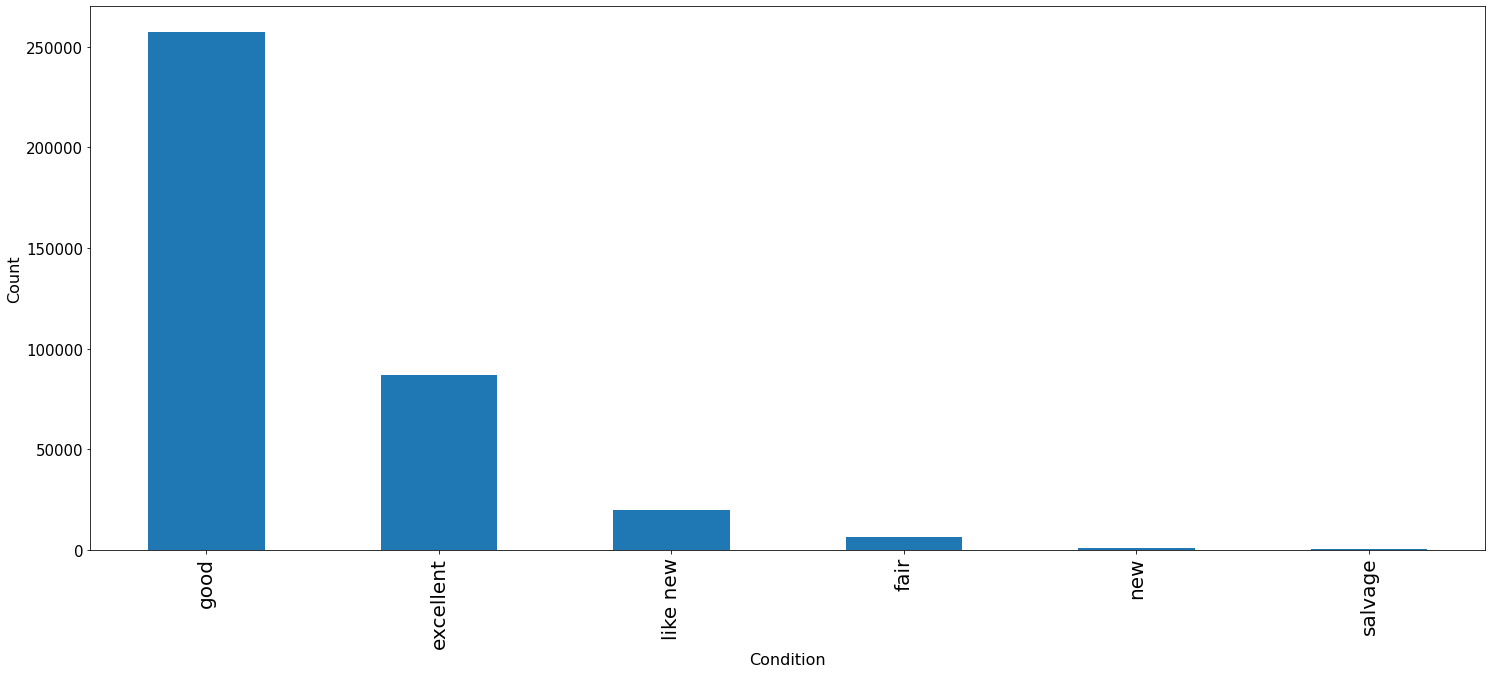

In [32]:
plt.figure(figsize=(25,10))
dataSet['condition'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Condition', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);


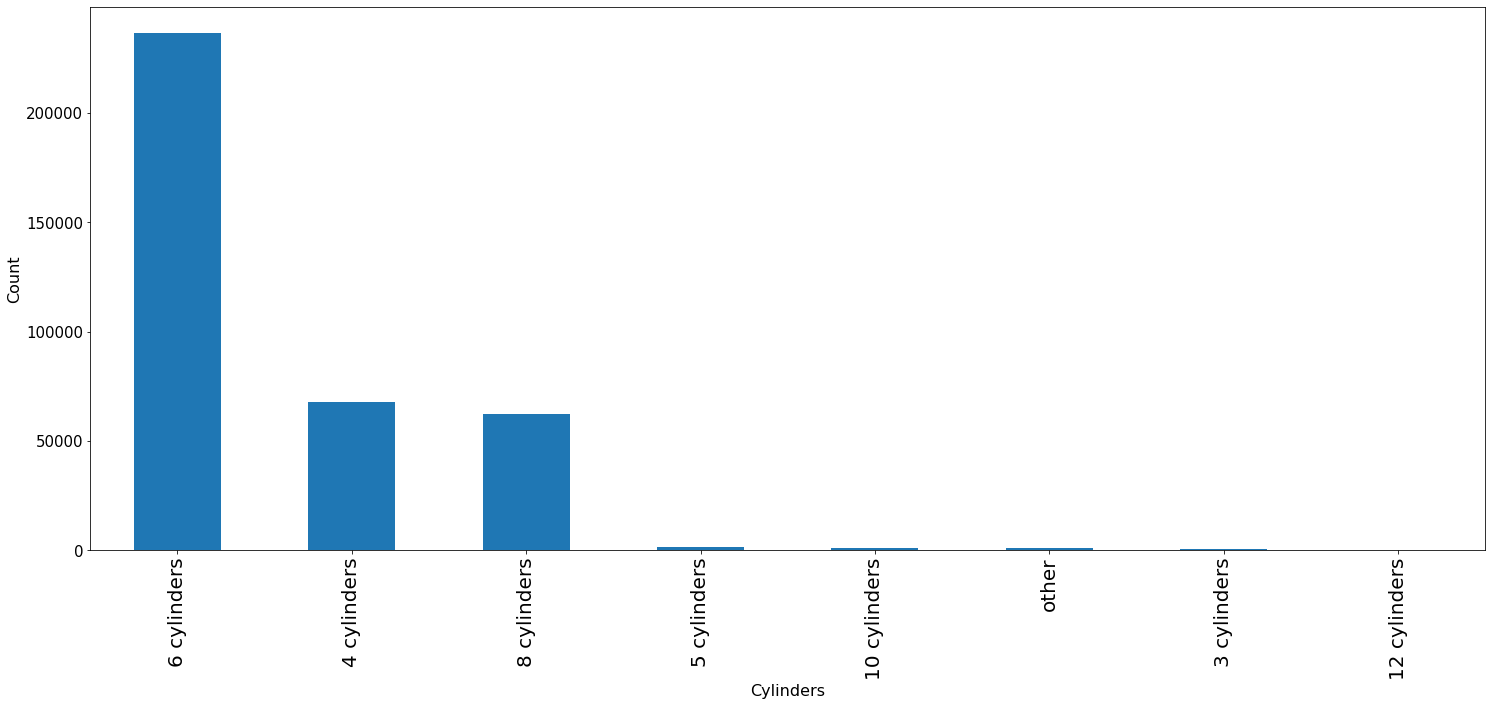

In [33]:
plt.figure(figsize=(25,10))
dataSet['cylinders'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Cylinders', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);


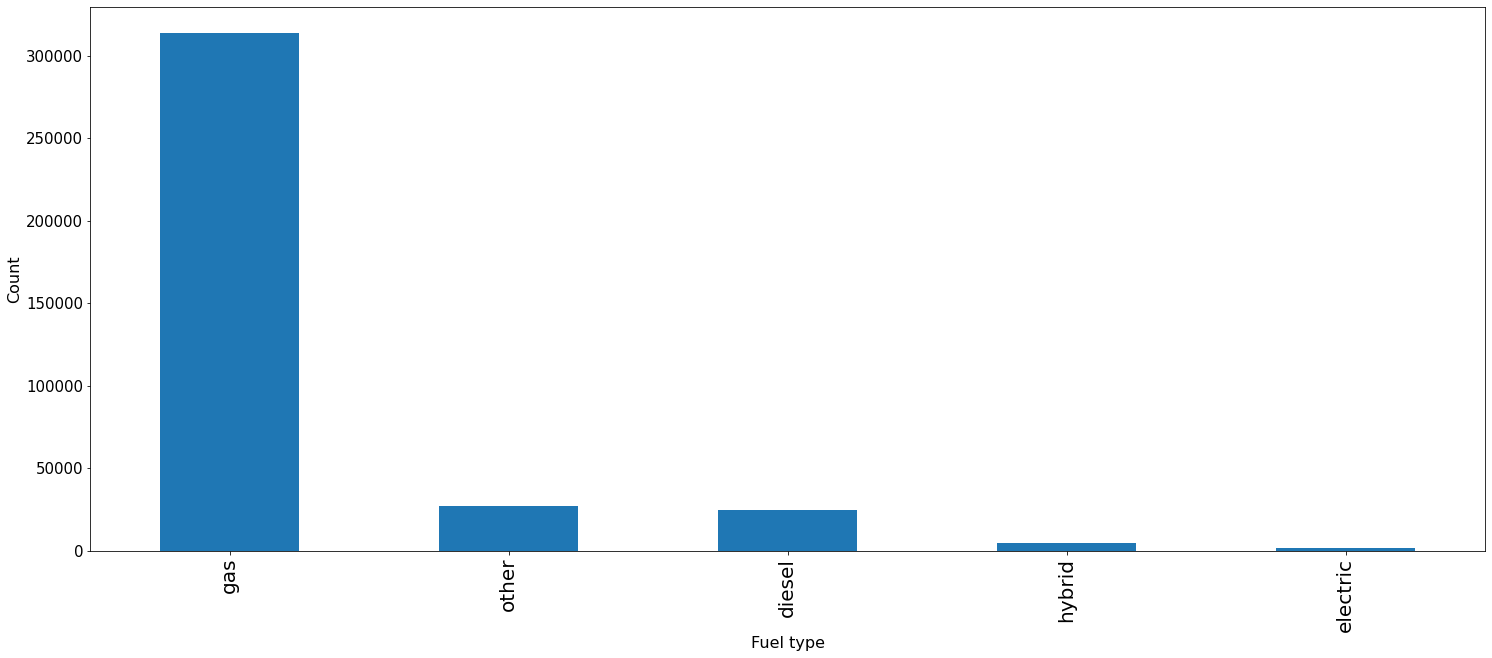

In [34]:
plt.figure(figsize=(25,10))
dataSet['fuel'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Fuel type', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

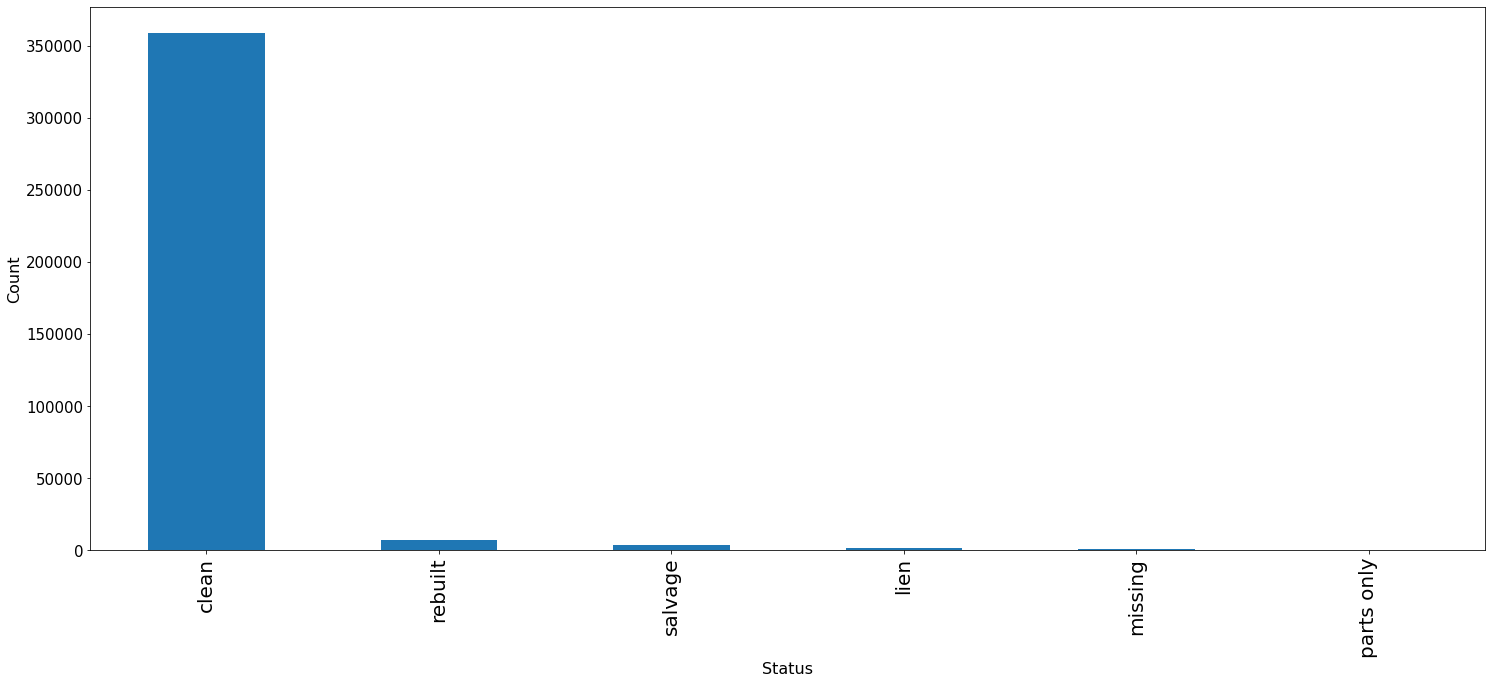

In [35]:
plt.figure(figsize=(25,10))
dataSet['title_status'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Status', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

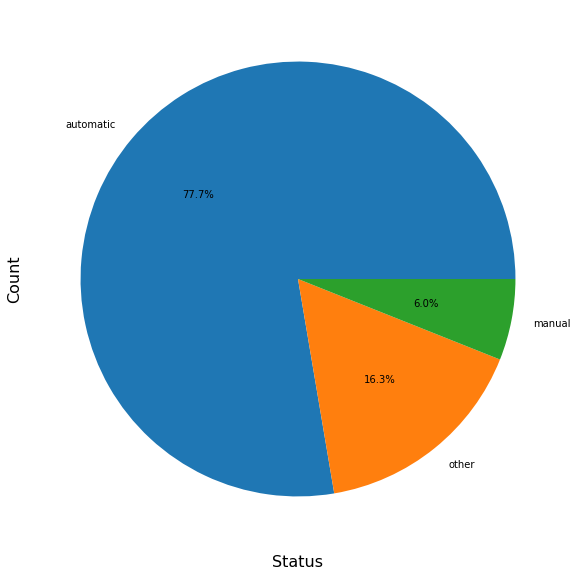

In [36]:
plt.figure(figsize=(25,10))
dataSet['transmission'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.xlabel('Status', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

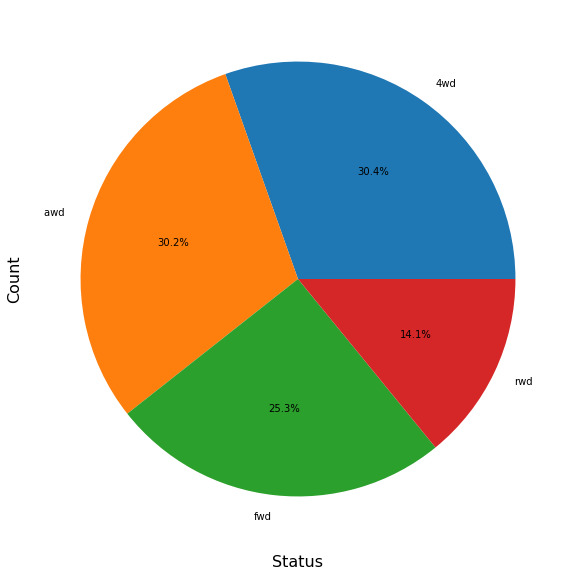

In [37]:
plt.figure(figsize=(25,10))
dataSet['drive'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.xlabel('Status', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

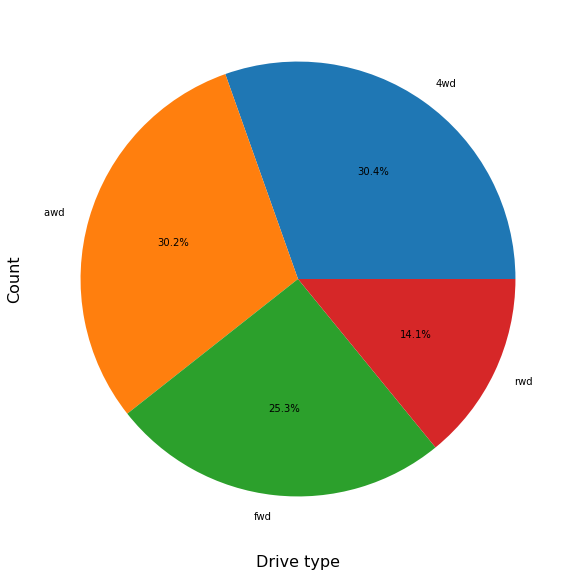

In [38]:
plt.figure(figsize=(25,10))
dataSet['drive'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.xlabel('Drive type', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

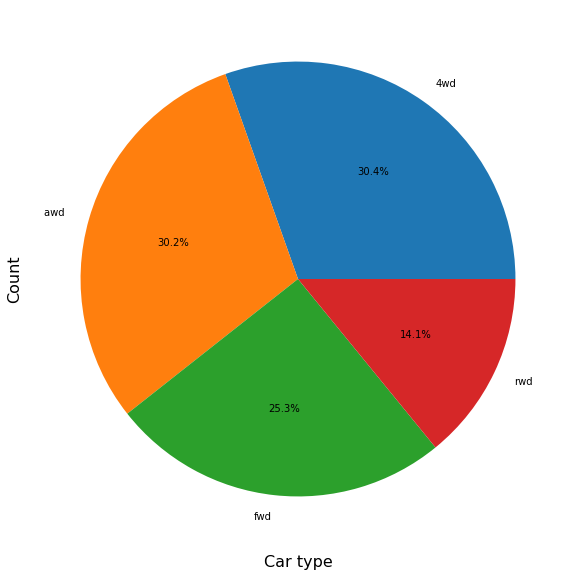

In [39]:
plt.figure(figsize=(25,10))
dataSet['drive'].value_counts().plot.pie(autopct='%1.1f%%')
plt.xticks(rotation=90)
plt.xlabel('Car type', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

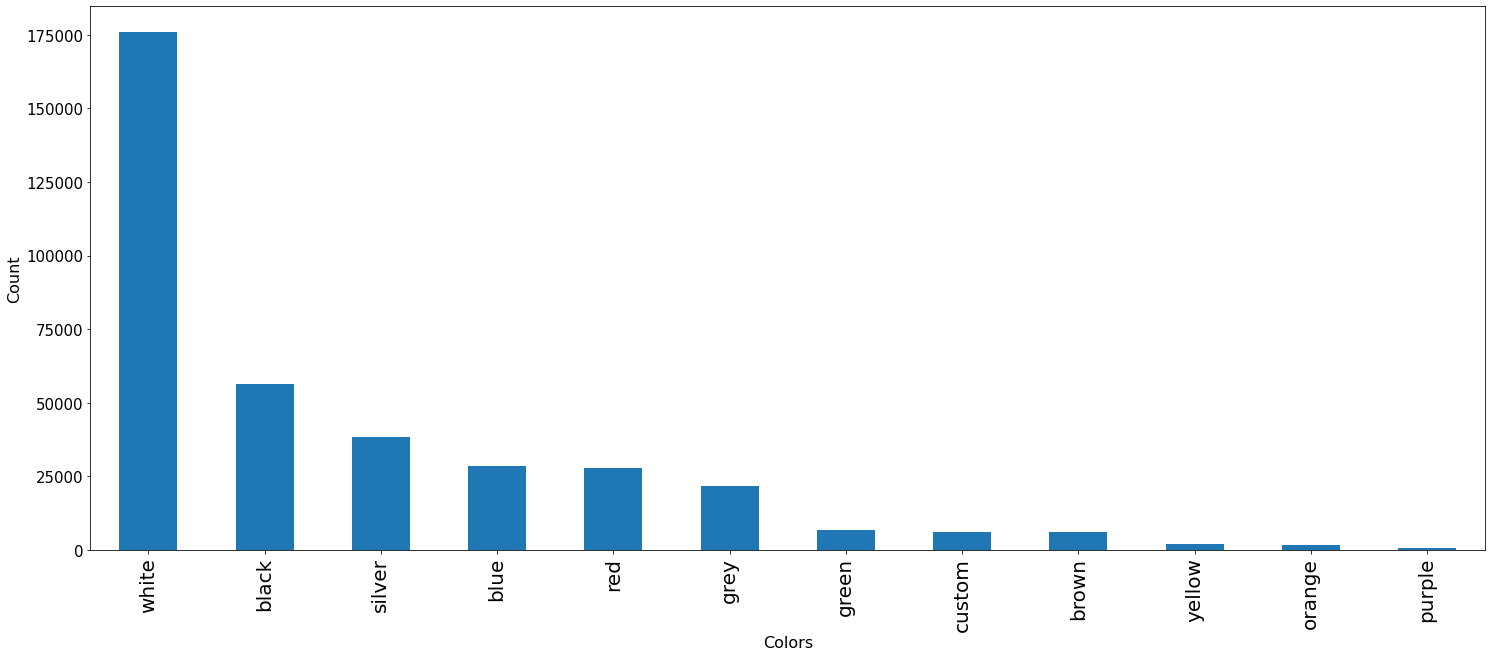

In [40]:
plt.figure(figsize=(25,10))
dataSet['paint_color'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('Colors', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

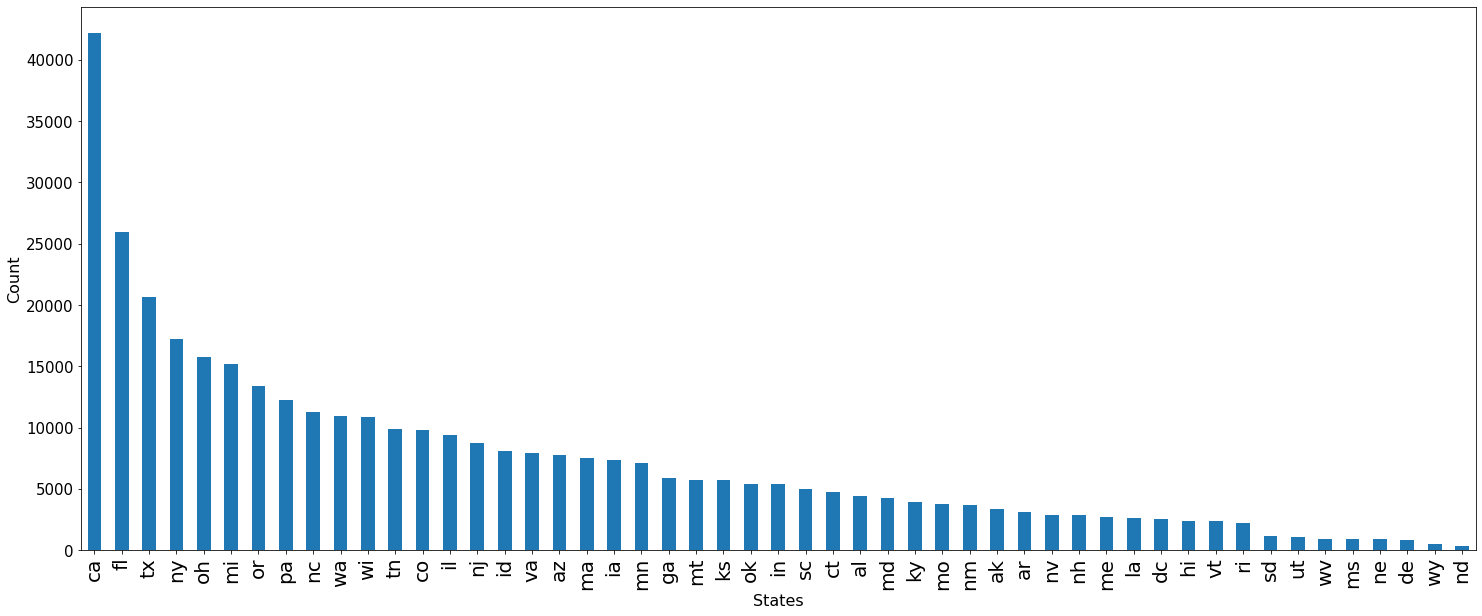

In [41]:
plt.figure(figsize=(25,10))
dataSet['state'].value_counts().plot.bar()
plt.xticks(rotation=90)
plt.xlabel('States', fontdict={'fontsize' : 16})
plt.xticks(fontsize=20)
plt.ylabel('Count', fontdict={'fontsize' : 16})
plt.yticks(fontsize=15);

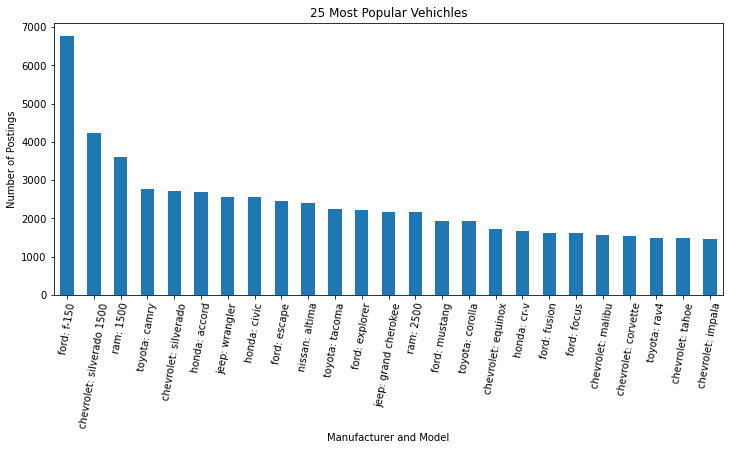

In [42]:
dataSet['make_model'] = dataSet['manufacturer'] + ': ' + dataSet['model'] 
com_cars = dataSet.make_model.value_counts()[:25]#the 50 most popular cars
com_cars.plot.bar(figsize=(12,5))
plt.xlabel('Manufacturer and Model')
plt.ylabel('Number of Postings')
plt.title('25 Most Popular Vehichles')
plt.xticks(rotation=80);


<Figure size 1800x720 with 0 Axes>

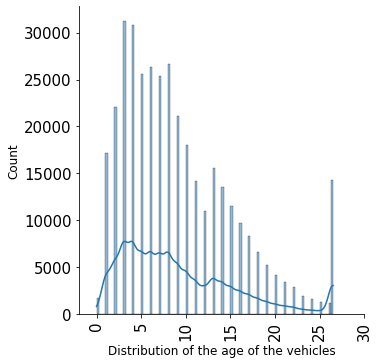

In [43]:
plt.figure(figsize=(25,10))
sns.displot(dataSet.age , kde=True )
plt.xticks(rotation=90)
plt.xlim(-2,30)
plt.xlabel('Distribution of the age of the vehicles', fontdict={'fontsize' : 12})
plt.xticks(fontsize=15 )
plt.ylabel('Count', fontdict={'fontsize' : 12})
plt.yticks(fontsize=15);

<Figure size 1800x720 with 0 Axes>

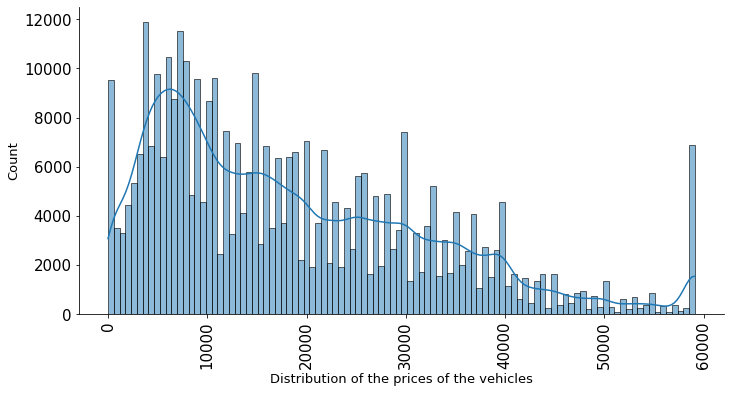

In [44]:
plt.figure(figsize=(25,10))
sns.displot(data=dataSet, x="price", aspect=2, height=5, kde=True )
plt.xticks(rotation=90)
plt.xlabel('Distribution of the prices of the vehicles', fontdict={'fontsize' : 13})
plt.xticks(fontsize=15 )
plt.ylabel('Count', fontdict={'fontsize' : 13})
plt.yticks(fontsize=15);

### Bivariate 
Data on each of two variables, where each value of one of the variables is paired with a value of the other variable

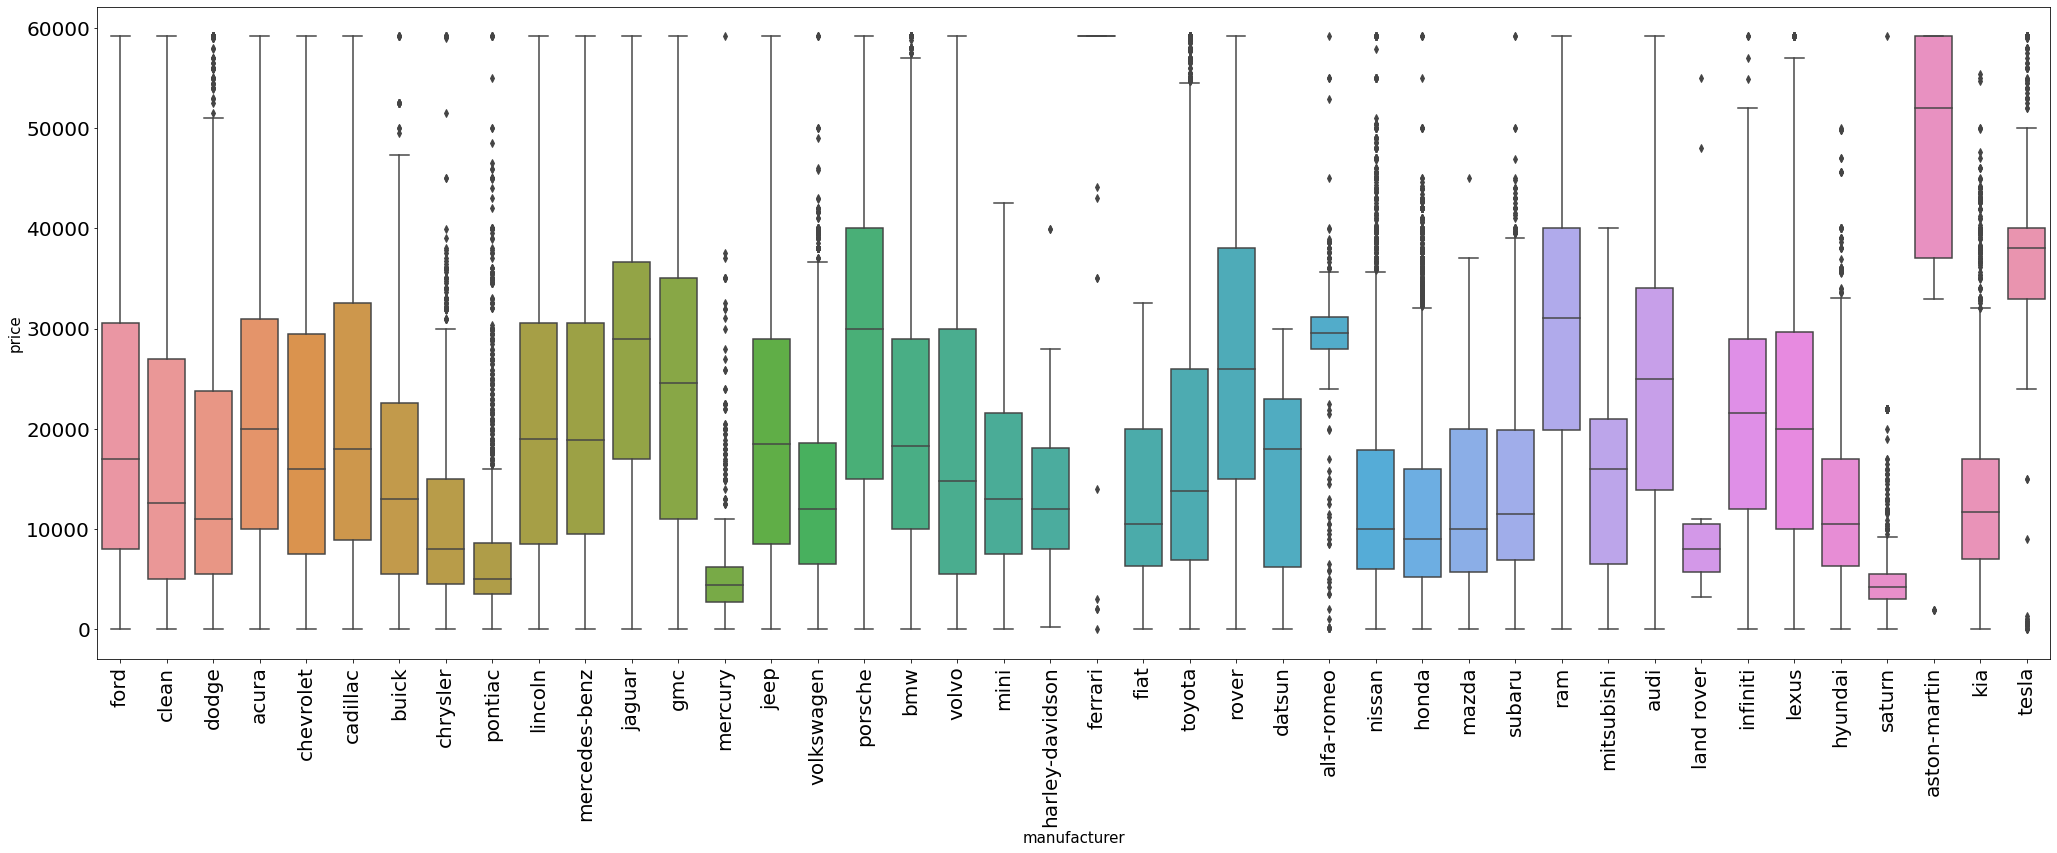

In [45]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="manufacturer", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('manufacturer',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

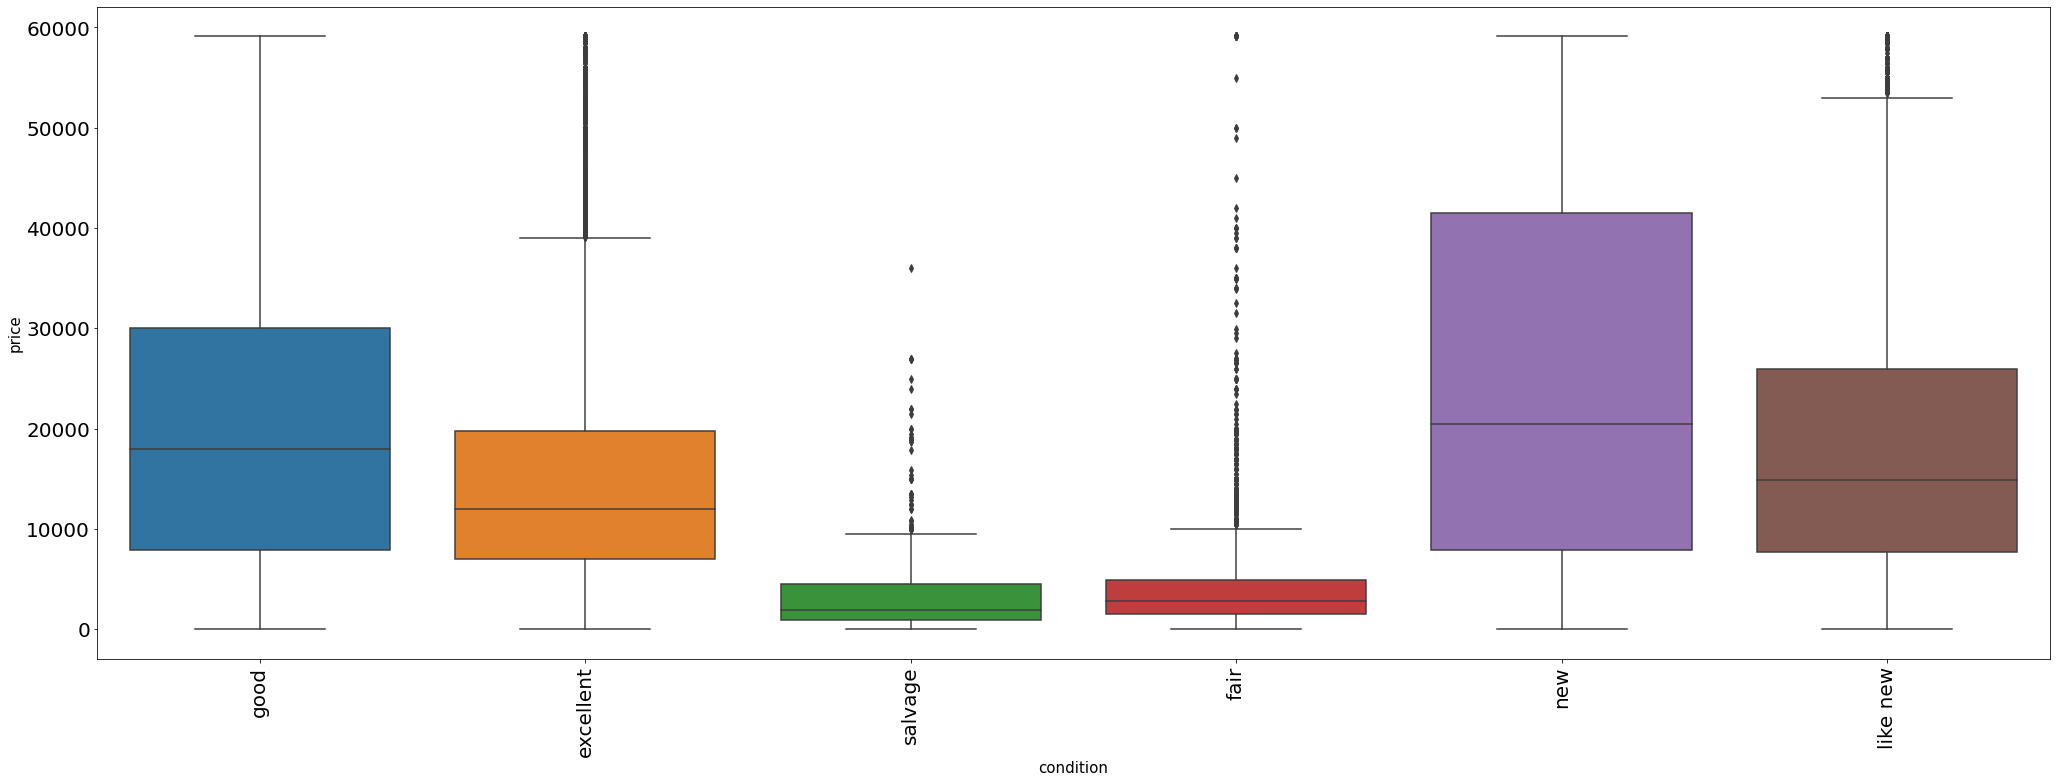

In [46]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="condition", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('condition',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

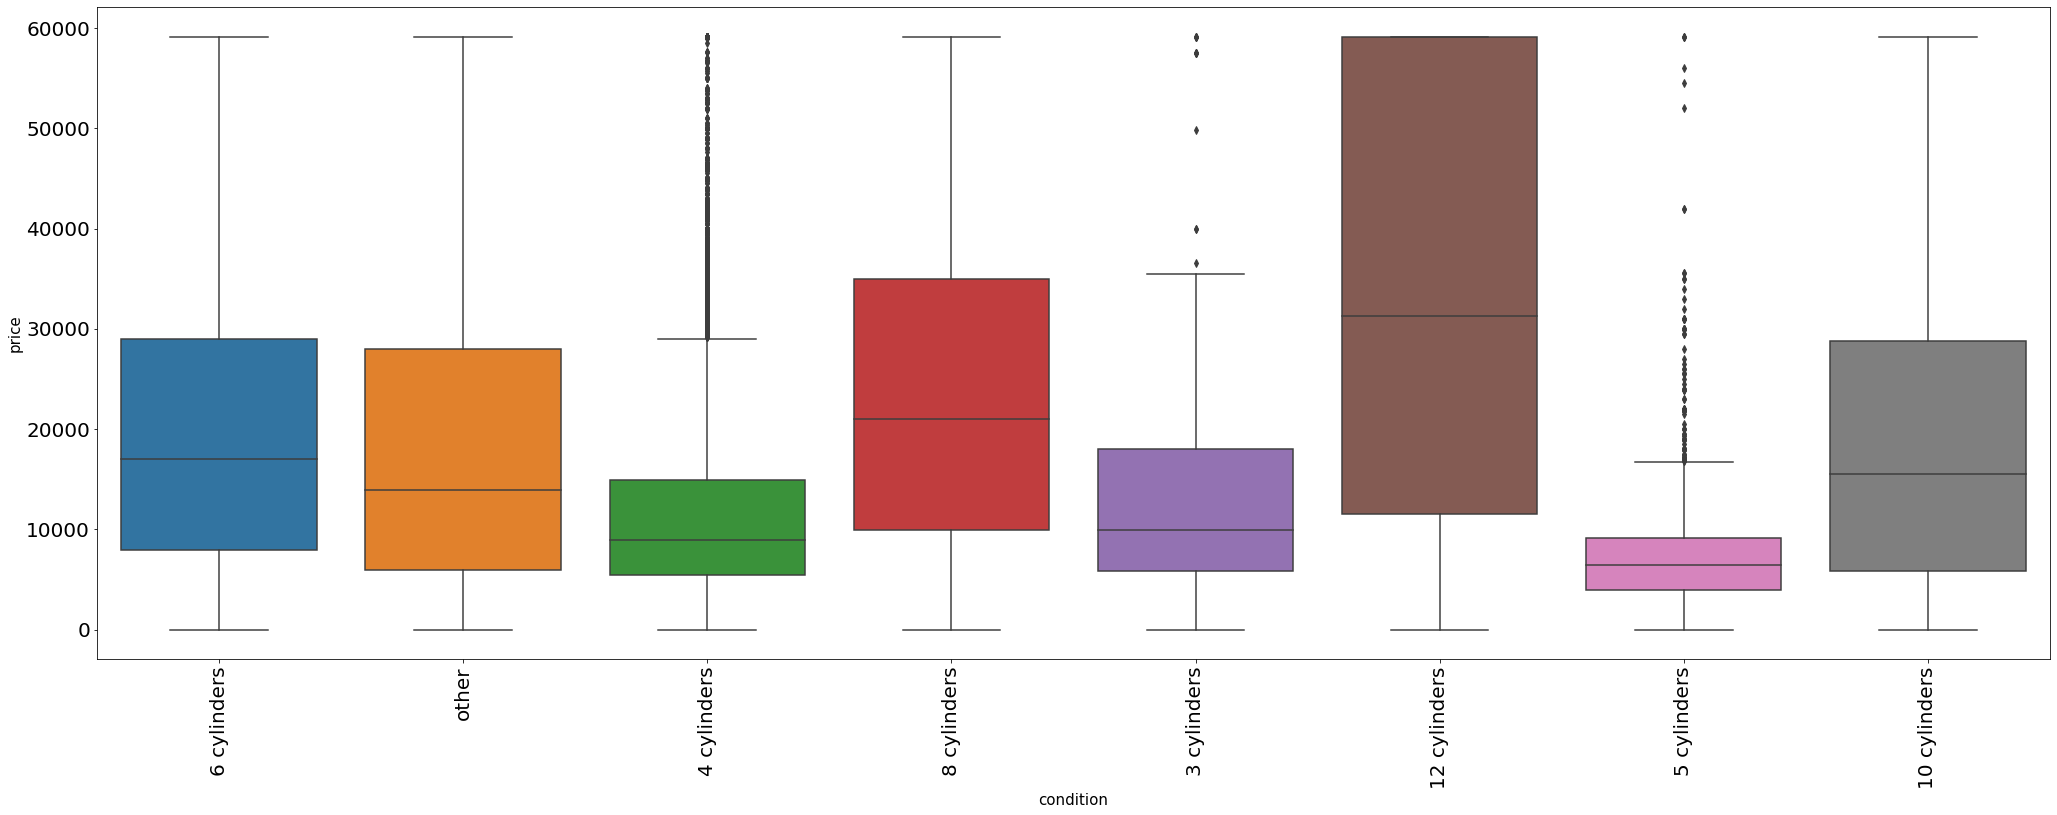

In [47]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="cylinders", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('condition',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

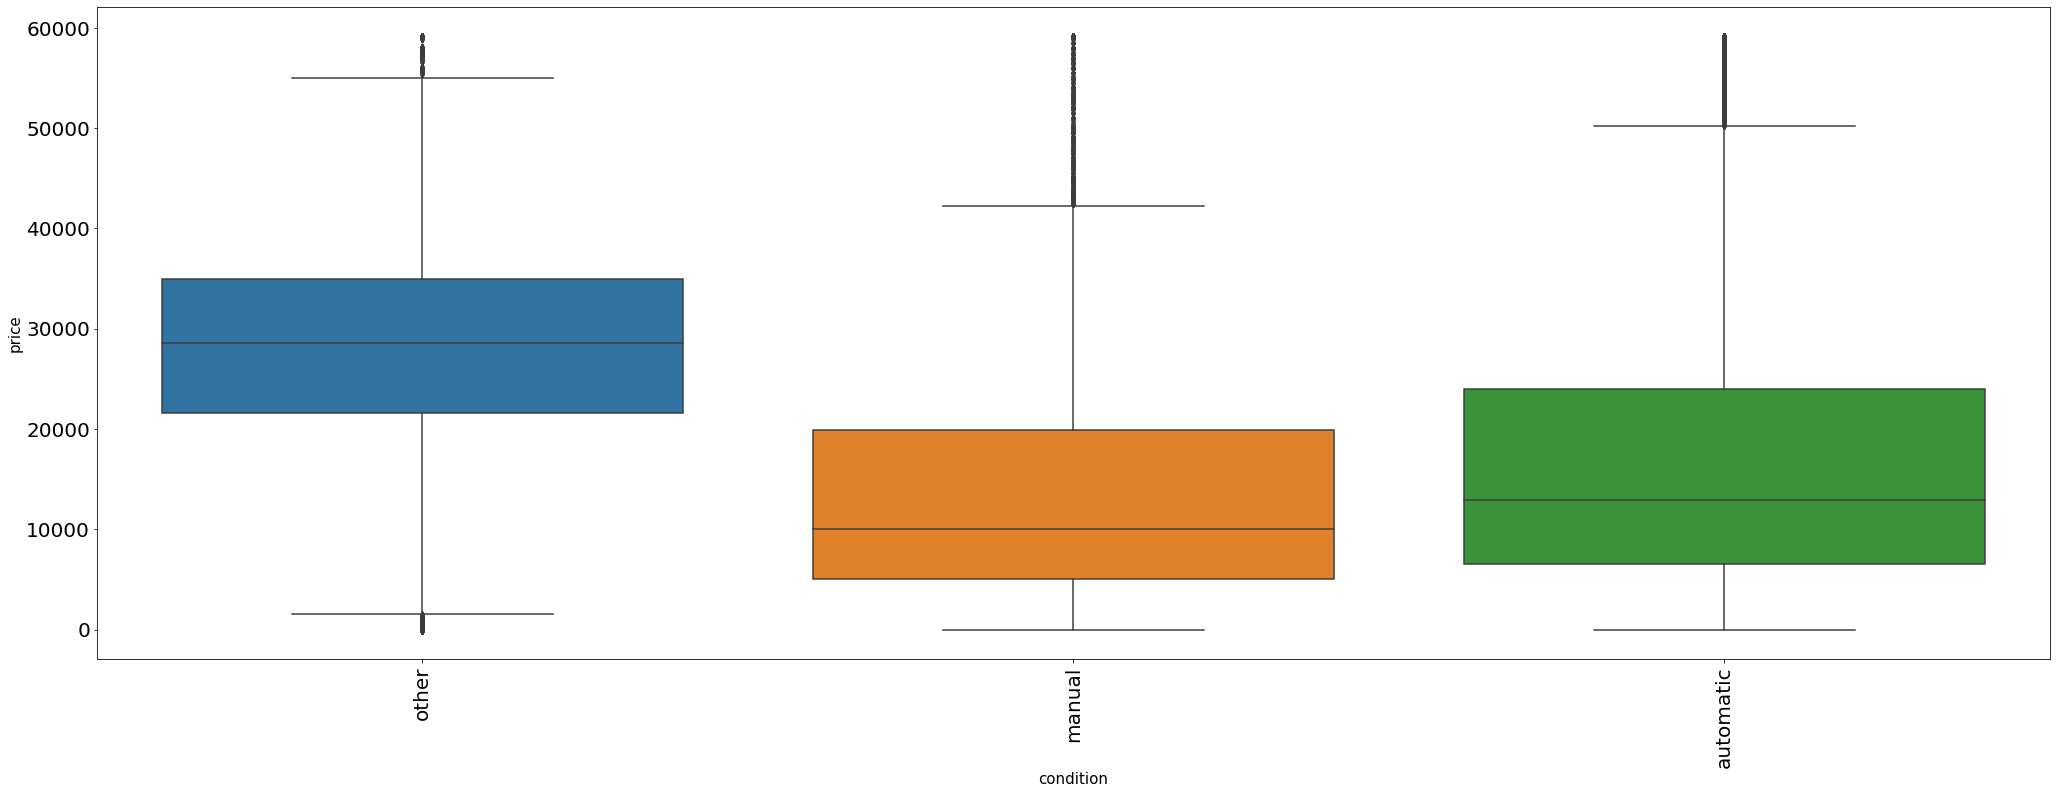

In [48]:
sns.boxplot(x="transmission", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('condition',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

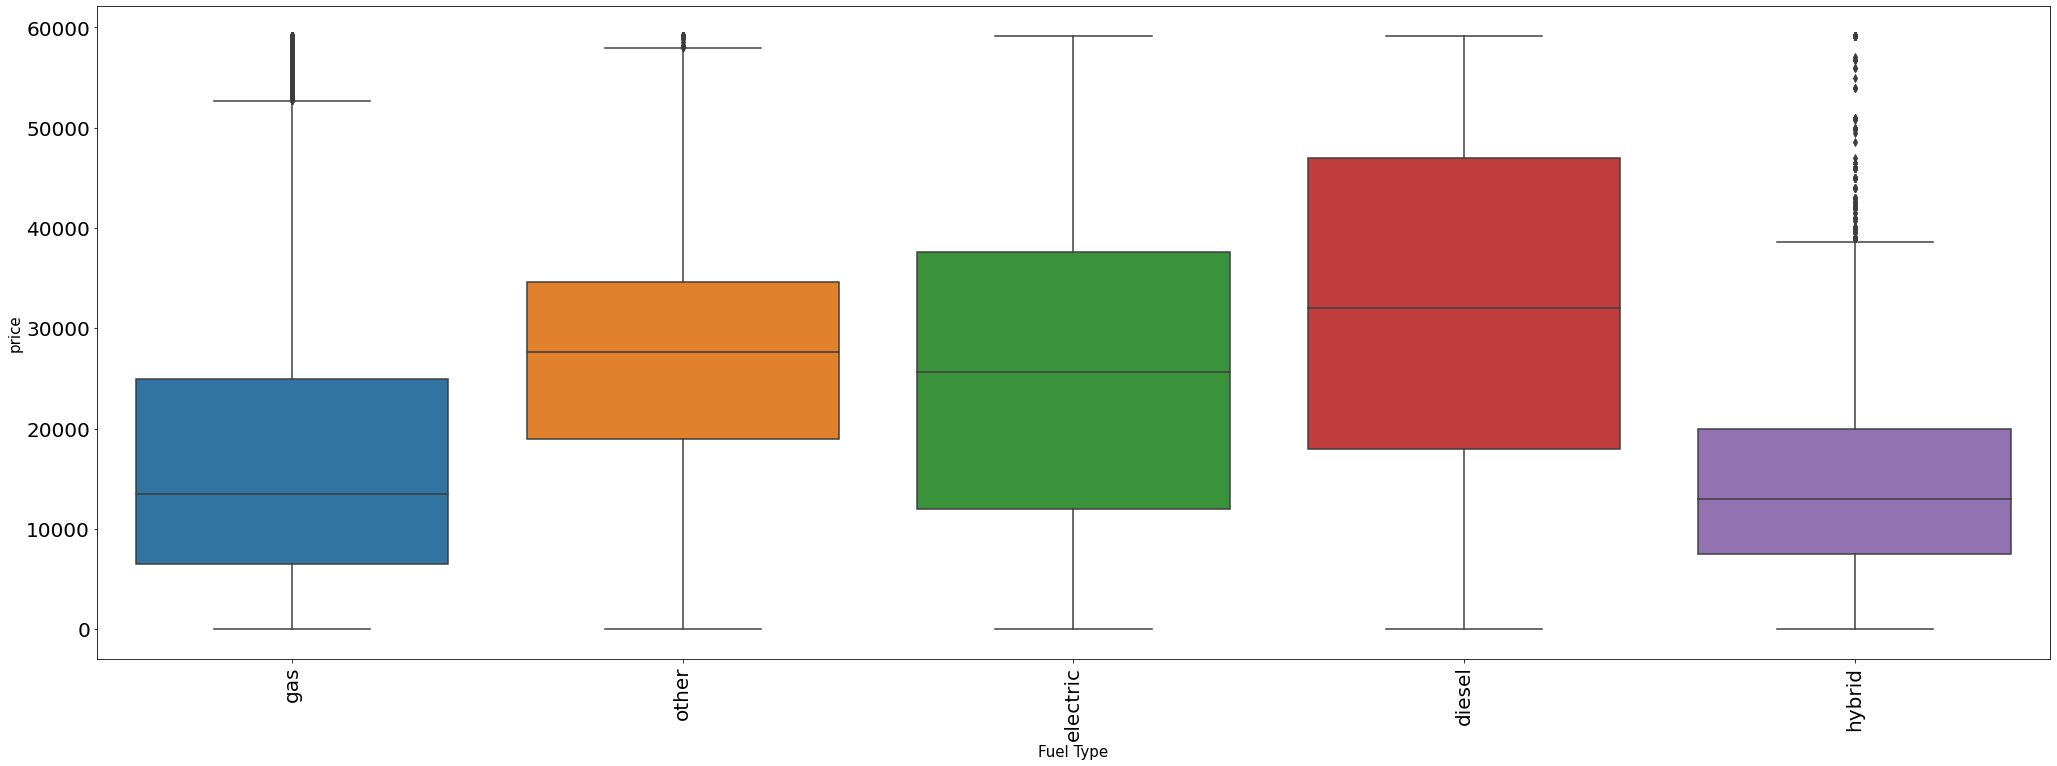

In [49]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="fuel", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('Fuel Type',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

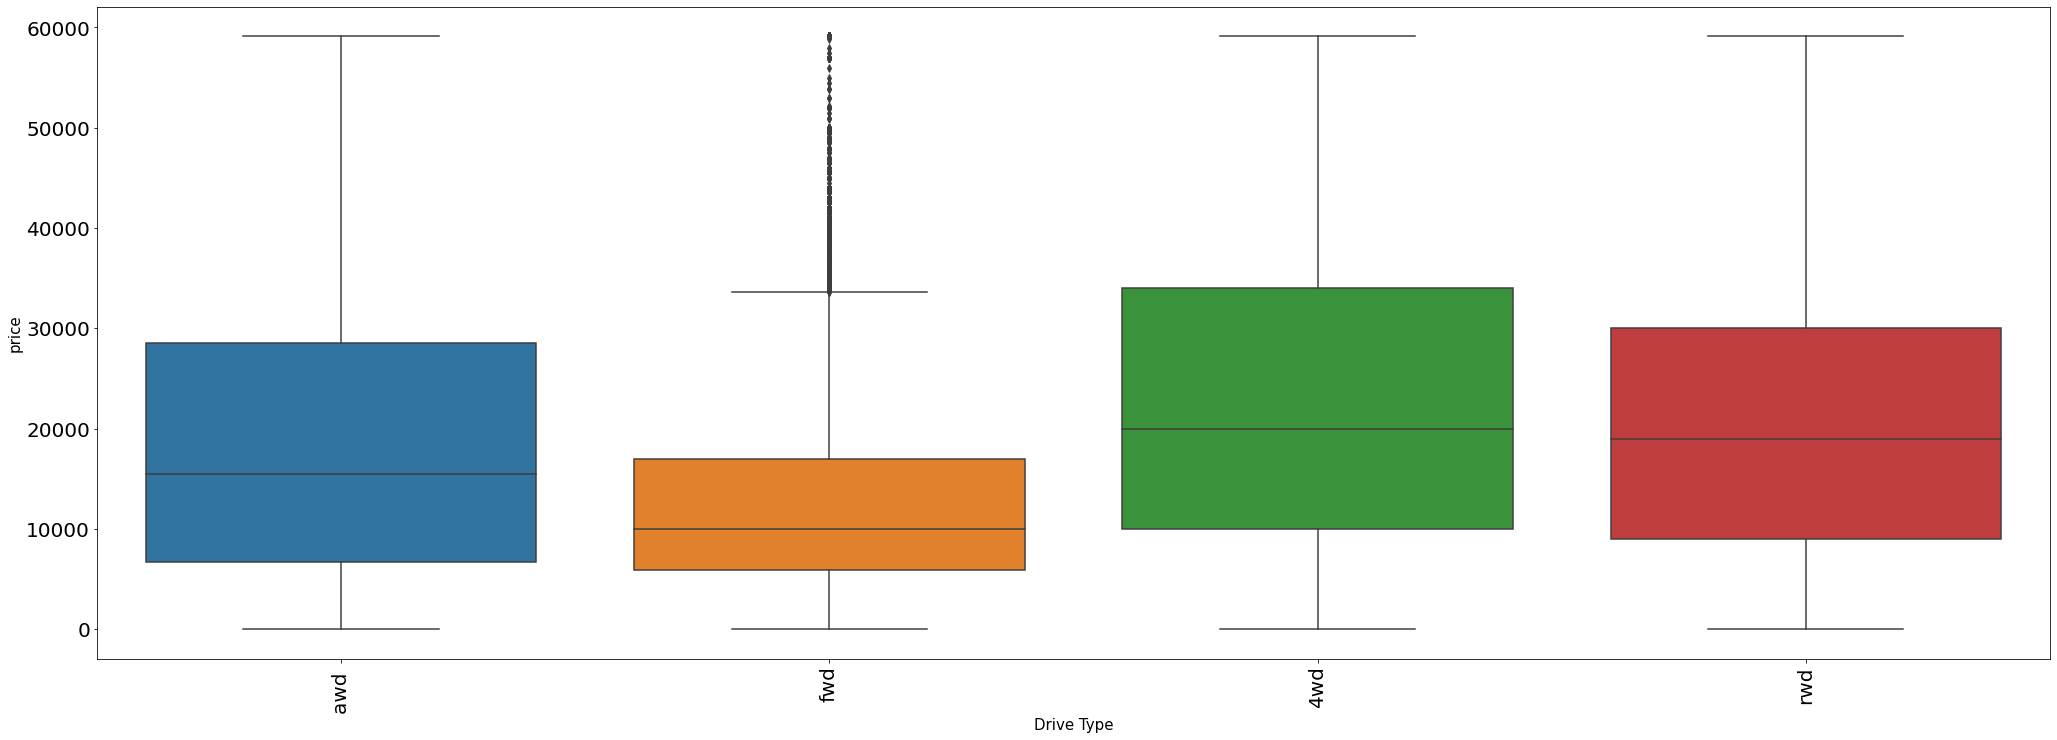

In [50]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="drive", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('Drive Type',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

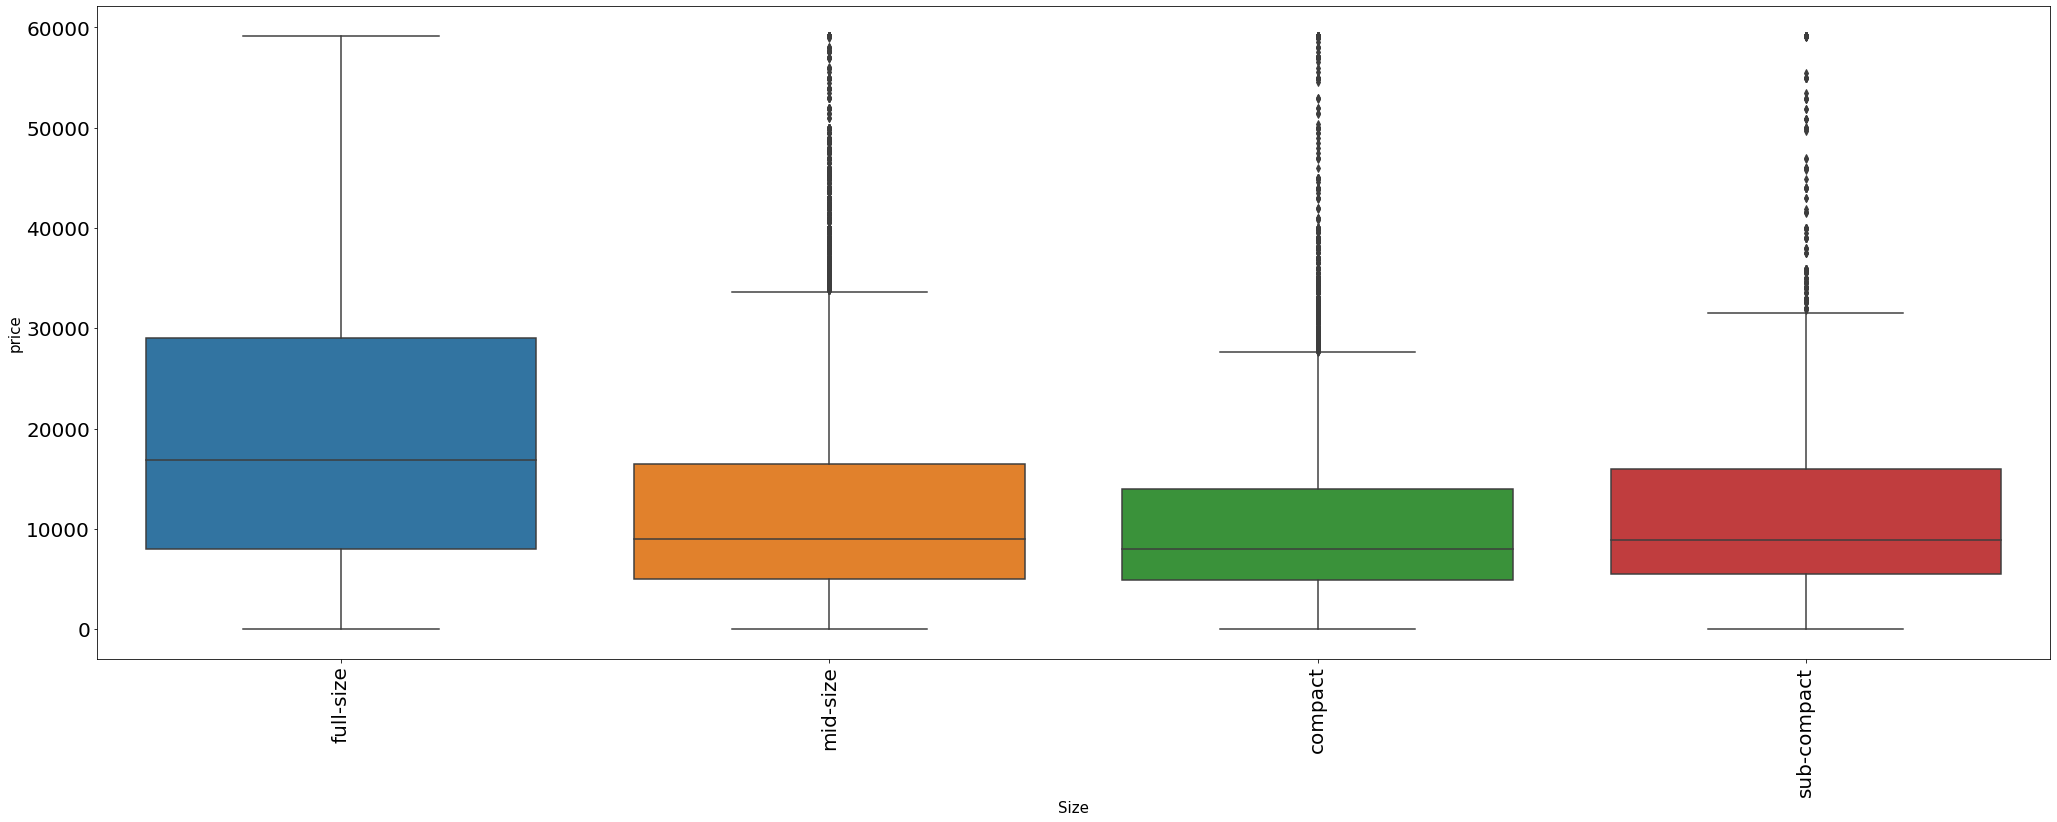

In [51]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="size", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('Size',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

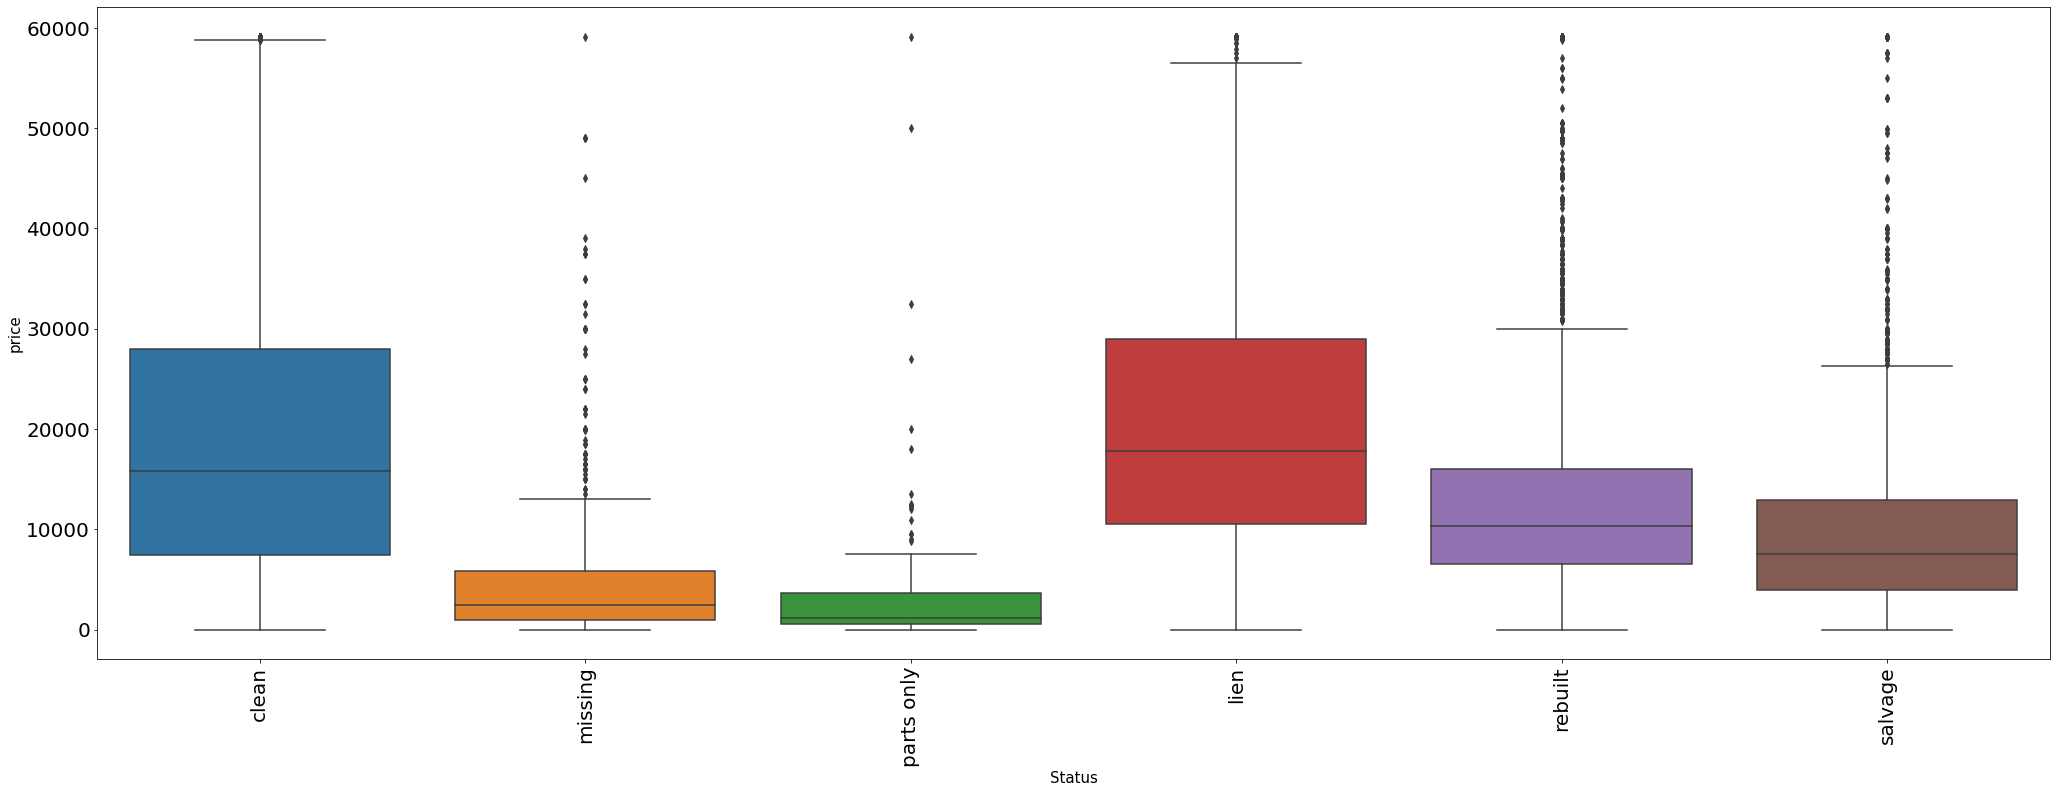

In [52]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="title_status", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('Status',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

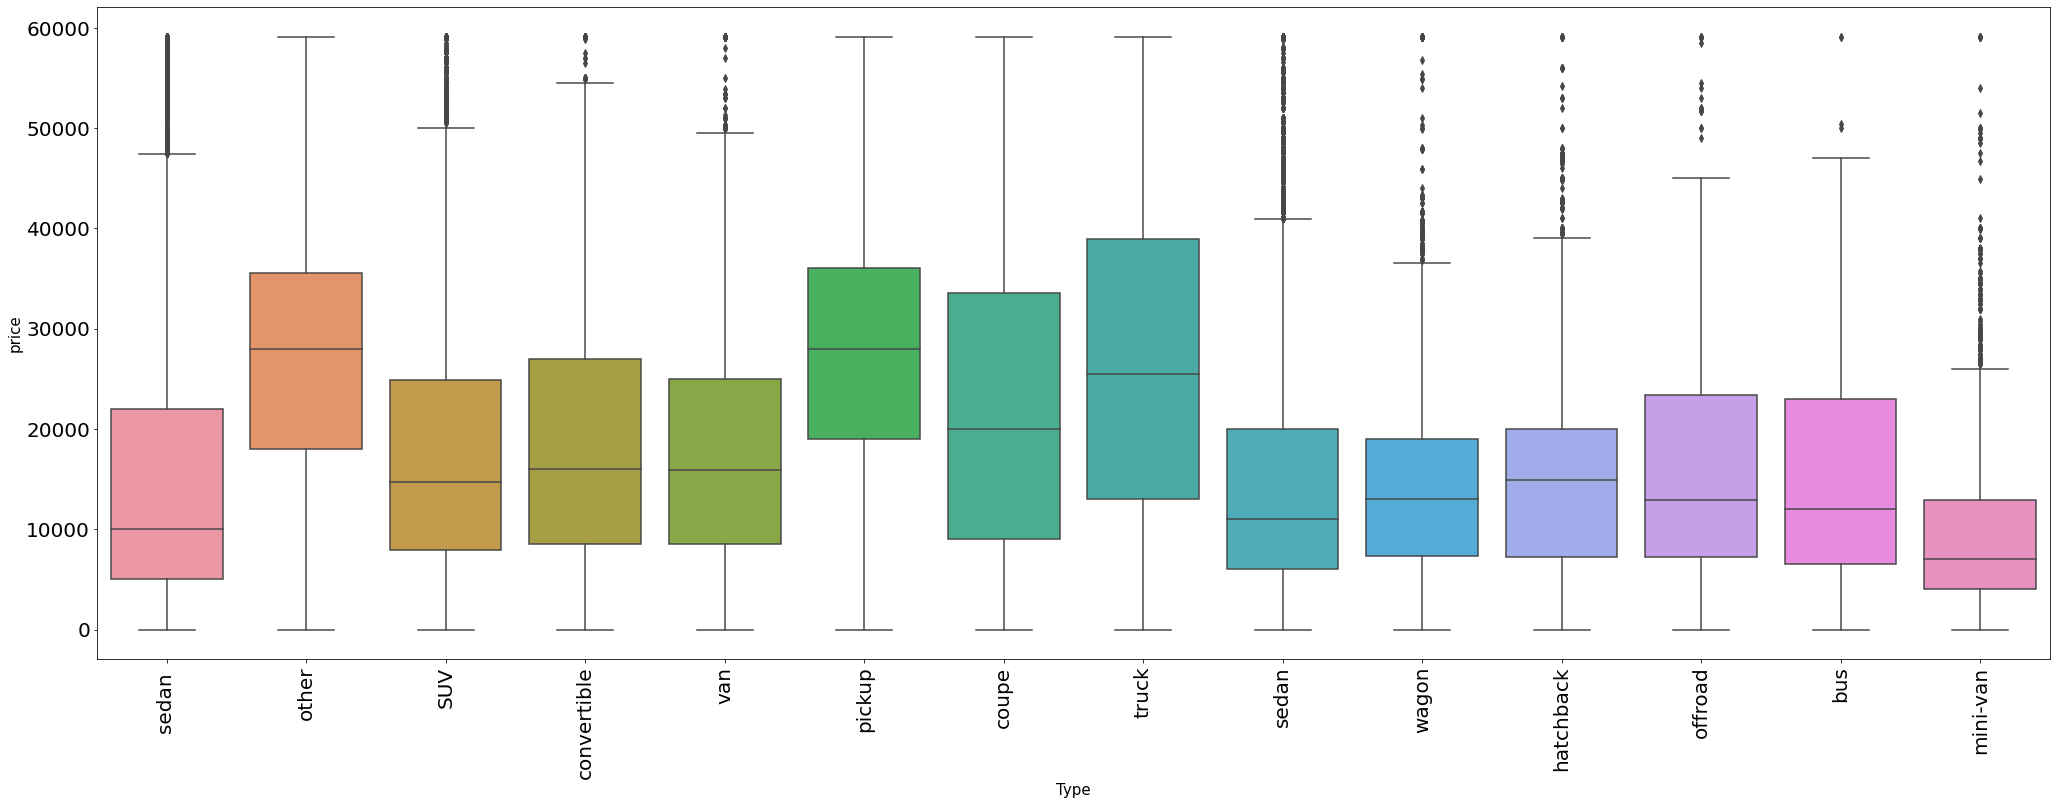

In [53]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="type", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('Type',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

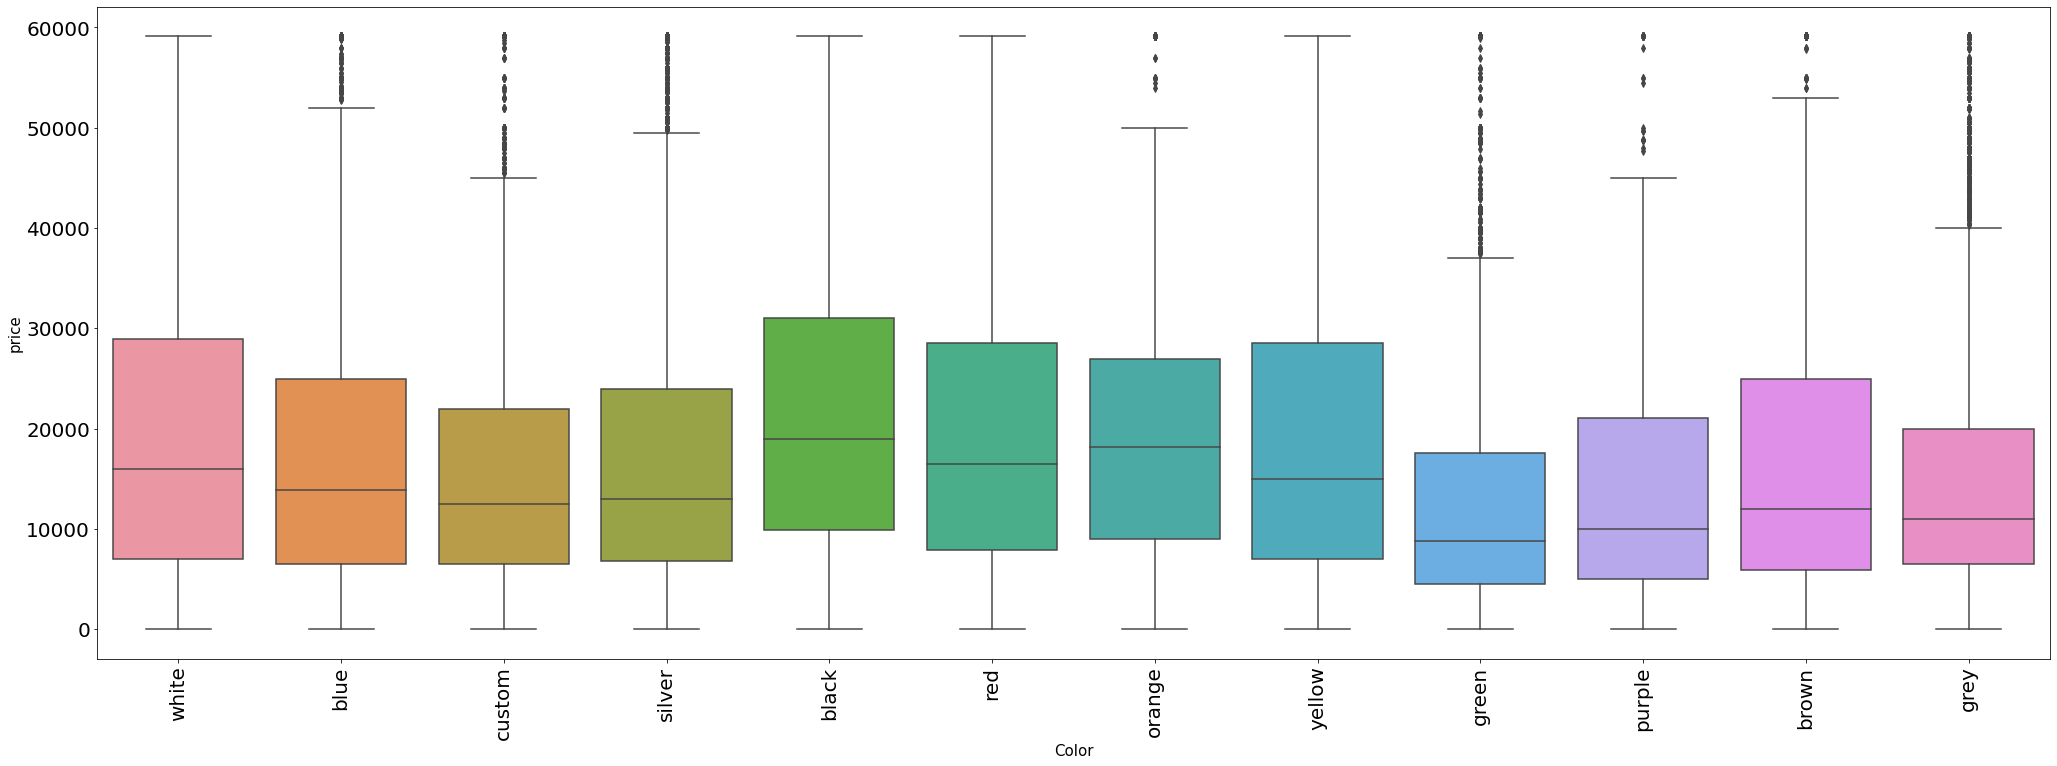

In [54]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="paint_color", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('Color',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

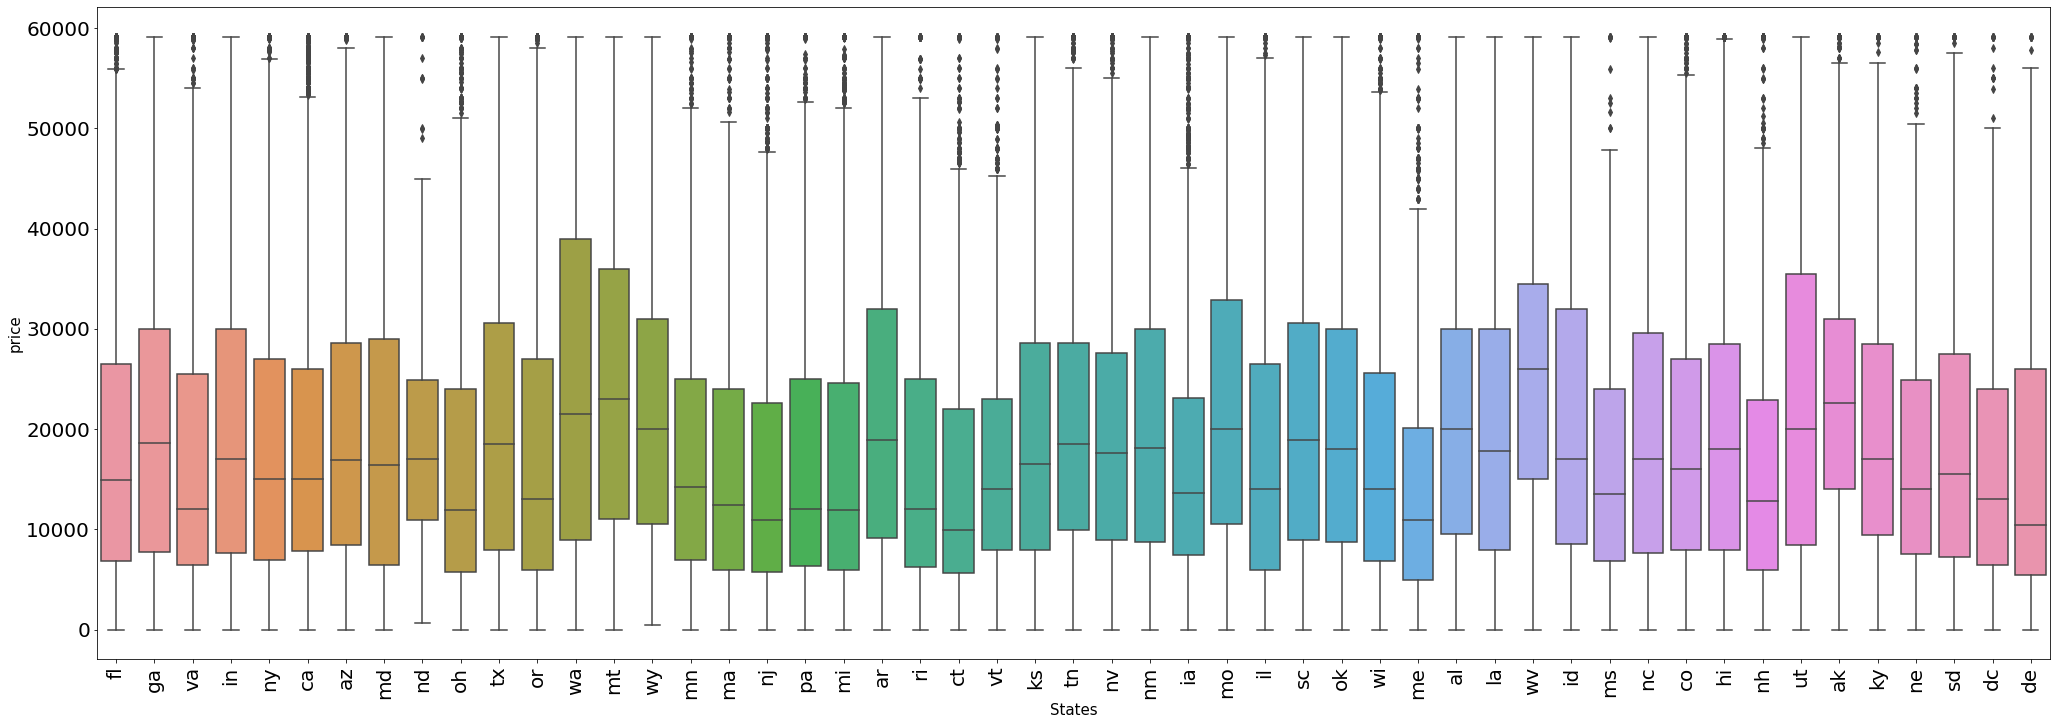

In [55]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="state", y="price", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('price',fontdict={'fontsize' : 15})
plt.xlabel('States',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

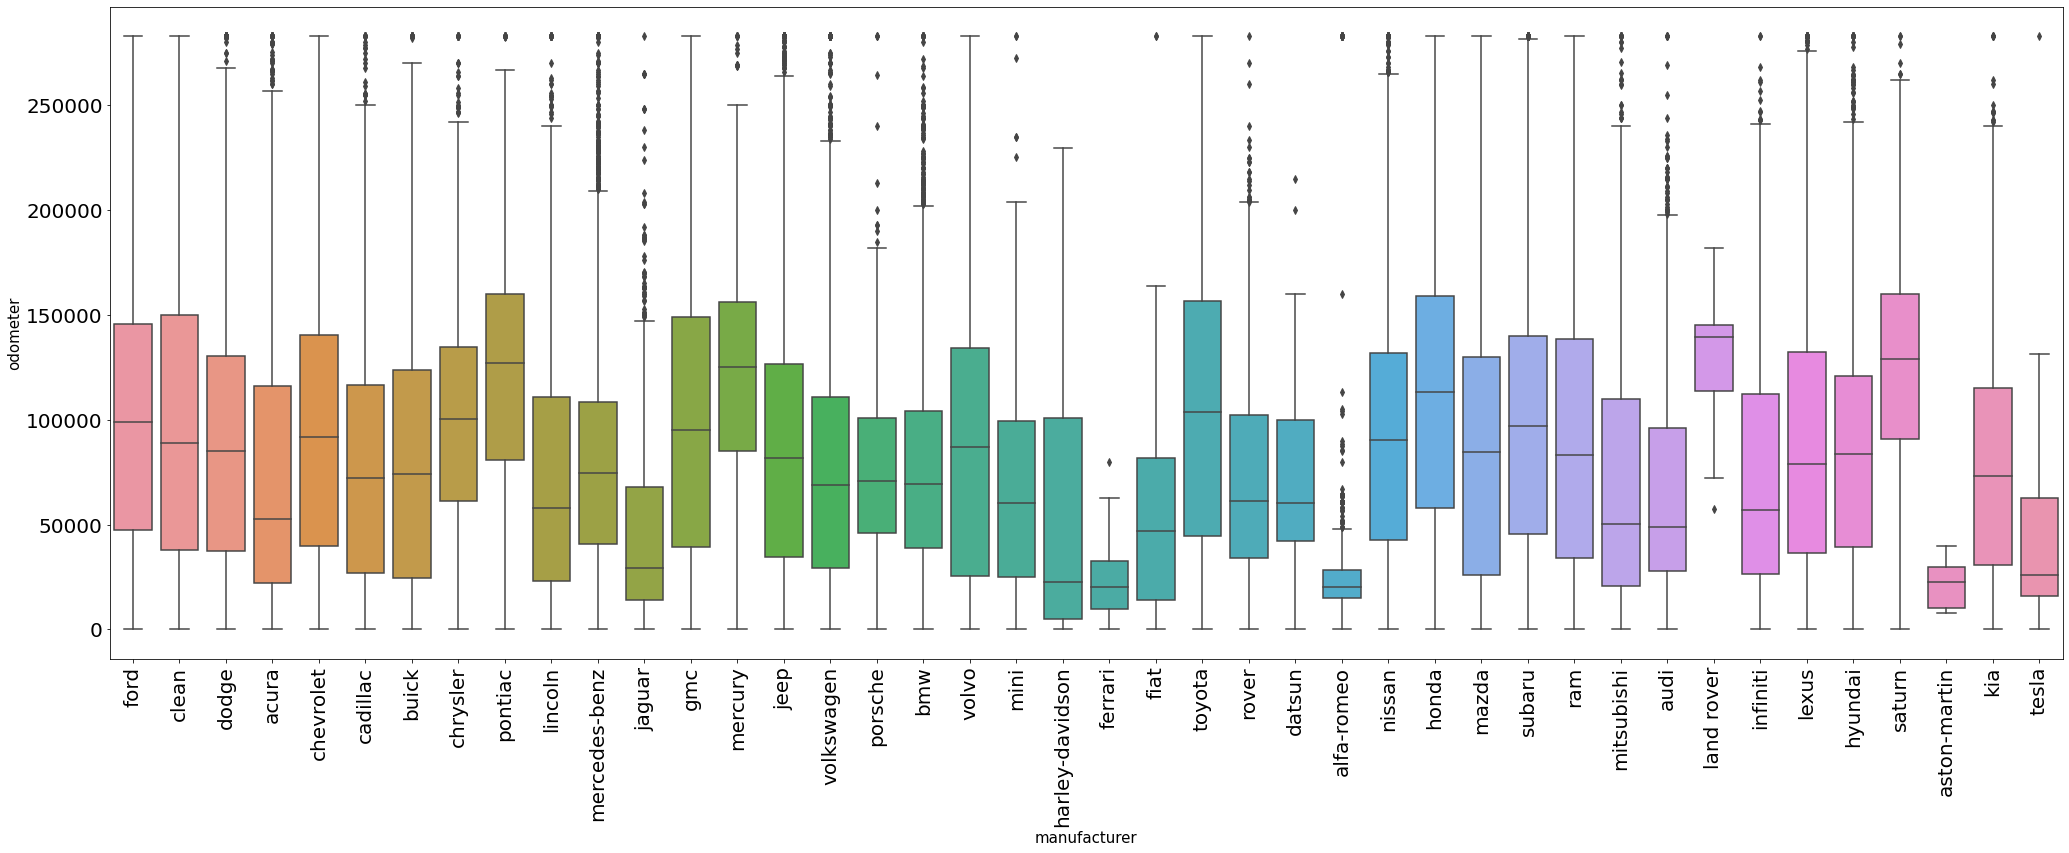

In [56]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.boxplot(x="manufacturer", y="odometer", data=dataSet );
plt.xticks(rotation=90)
plt.ylabel('odometer',fontdict={'fontsize' : 15})
plt.xlabel('manufacturer',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

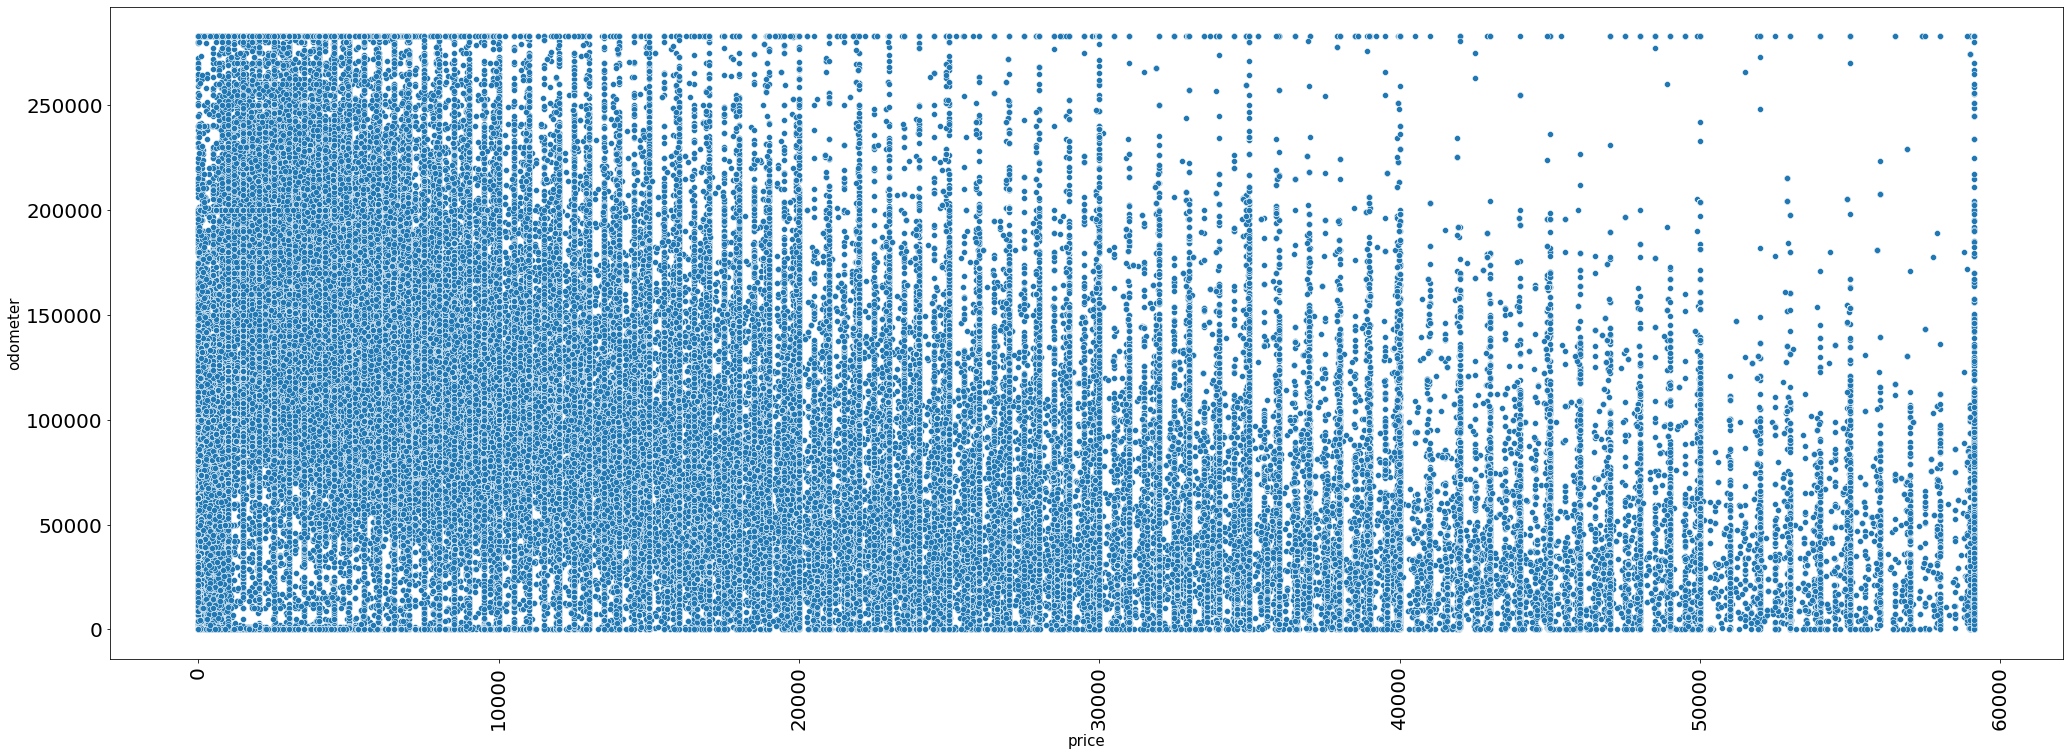

In [57]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.scatterplot(data=dataSet, x="price", y="odometer" )
plt.xticks(rotation=90)
plt.ylabel('odometer',fontdict={'fontsize' : 15})
plt.xlabel('price',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

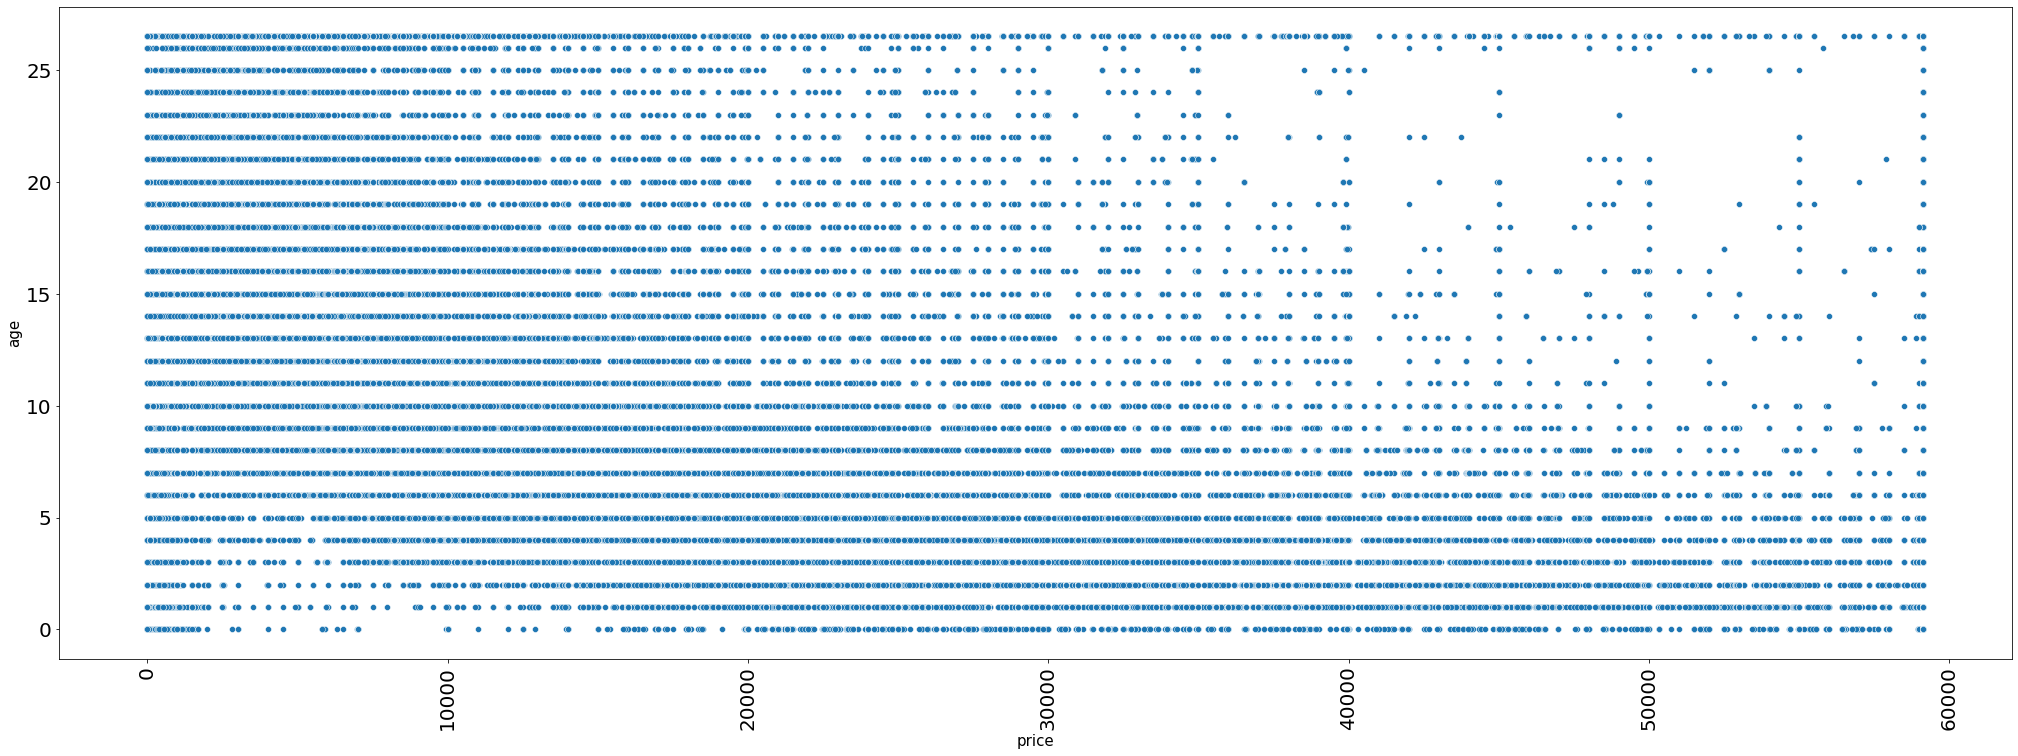

In [58]:
plt.rcParams['figure.figsize'] = (35, 12)
sns.scatterplot(data=dataSet, x="price", y="age" )
plt.xticks(rotation=90)
plt.ylabel('age',fontdict={'fontsize' : 15})
plt.xlabel('price',fontdict={'fontsize' : 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

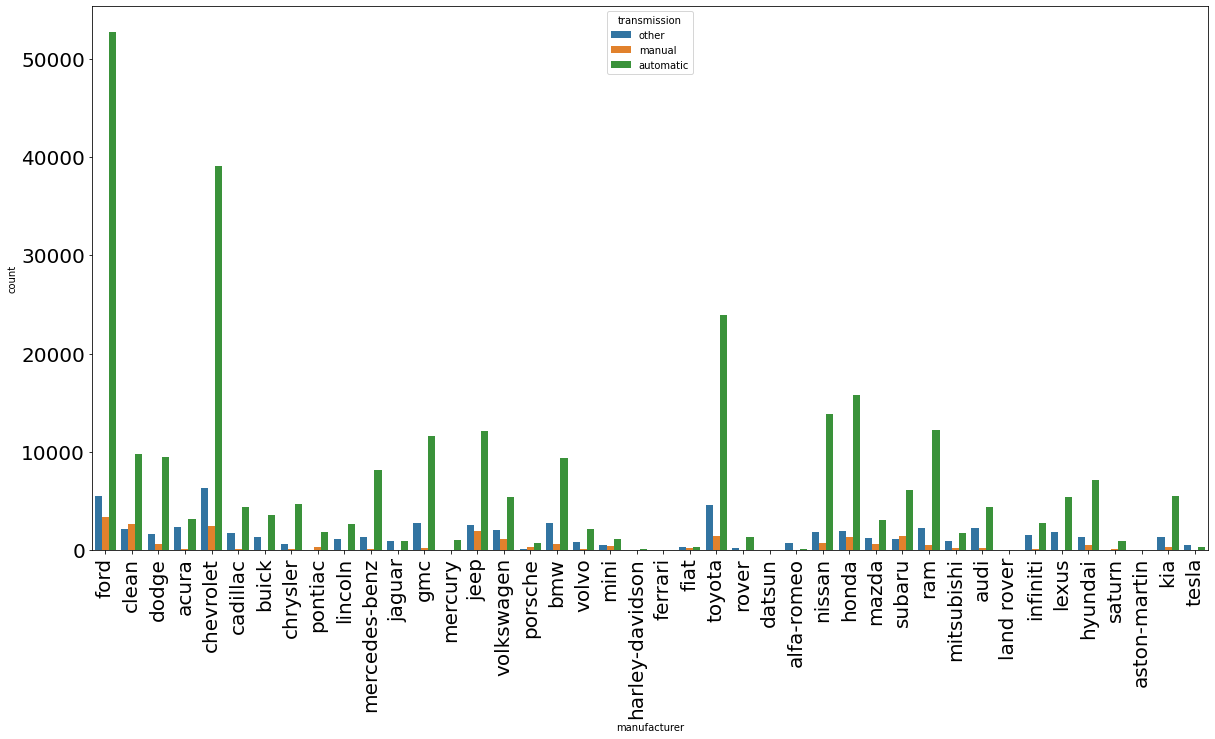

In [61]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x="manufacturer", hue="transmission", data=dataSet );
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

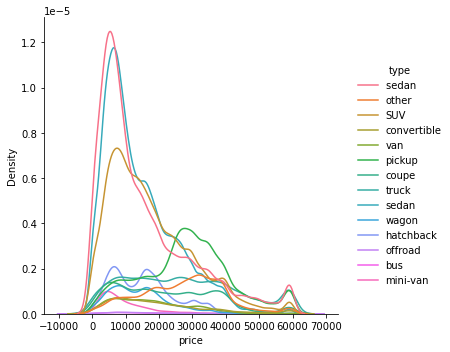

In [62]:
sns.displot(dataSet, x='price', hue='type', kind='kde')

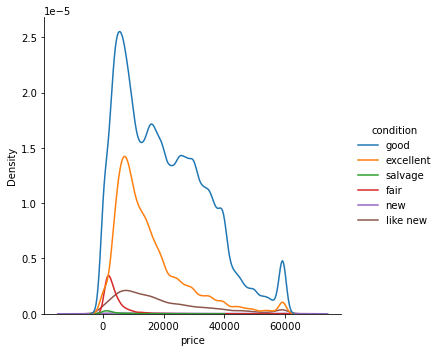

In [63]:
sns.displot(dataSet, x='price', hue='condition', kind='kde')

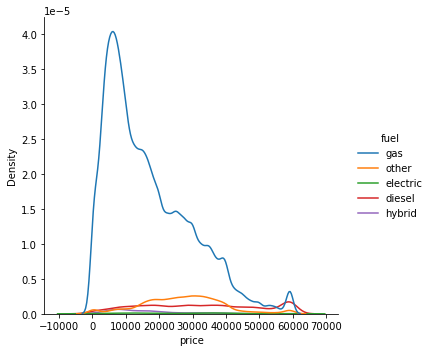

In [64]:
sns.displot(dataSet, x='price', hue='fuel', kind='kde')

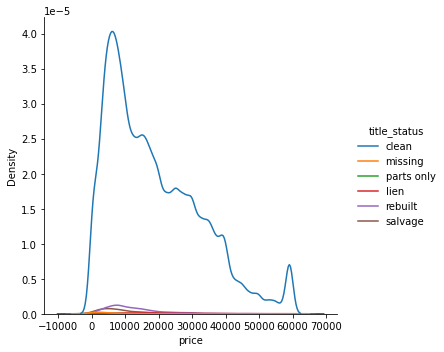

In [65]:
sns.displot(dataSet, x='price', hue='title_status', kind='kde')

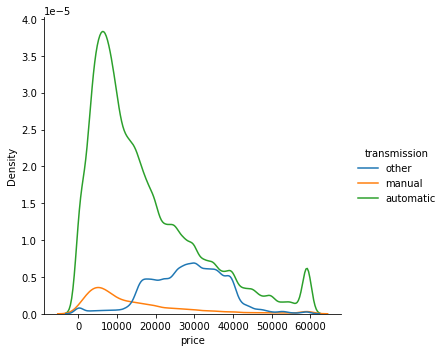

In [66]:
sns.displot(dataSet, x='price', hue='transmission', kind='kde')

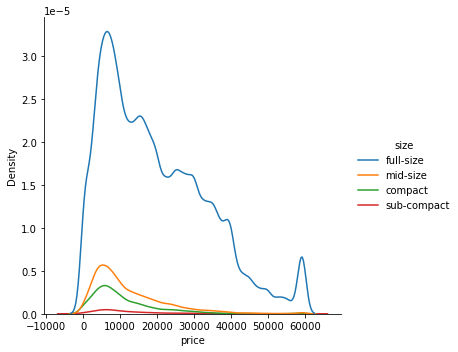

In [67]:
sns.displot(dataSet, x='price', hue='size', kind='kde')

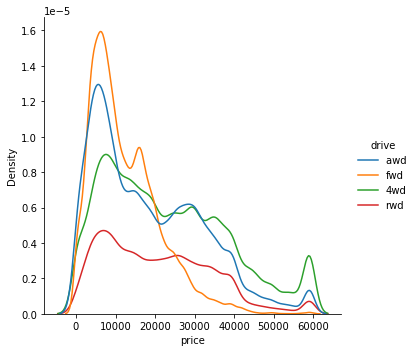

In [68]:
sns.displot(dataSet, x='price', hue='drive', kind='kde')

<AxesSubplot:>

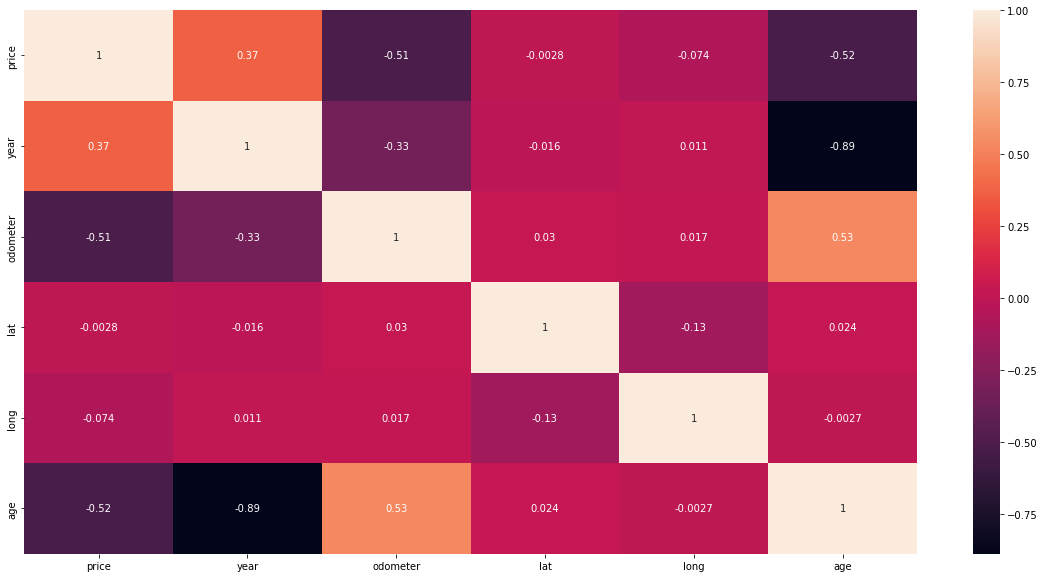

In [69]:
sns.heatmap(dataSet.corr() , annot=True )

# Dealind with dummy Values

In [72]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = dataSet.columns.values.tolist()
for col in features:
    if dataSet[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in dataSet.columns:
        le = LabelEncoder()
        le.fit(list(dataSet[col].astype(str).values))
        dataSet[col] = le.transform(list(dataSet[col].astype(str).values))

# Spliting data

In [101]:
# Determine X , y   
y=dataSet['price'].values
X=dataSet.iloc[:,1:].values

# Spliting data with 66% for training and 33% for testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Y_actual=pd.DataFrame(y_test, columns=['Y_actual'])
Y_actual

,Y_actual
0,24990
1,10980
2,10500
3,54969
4,16995
...,...
122728,59125
122729,2999
122730,10999
122731,622


# Modeling

<AxesSubplot:>

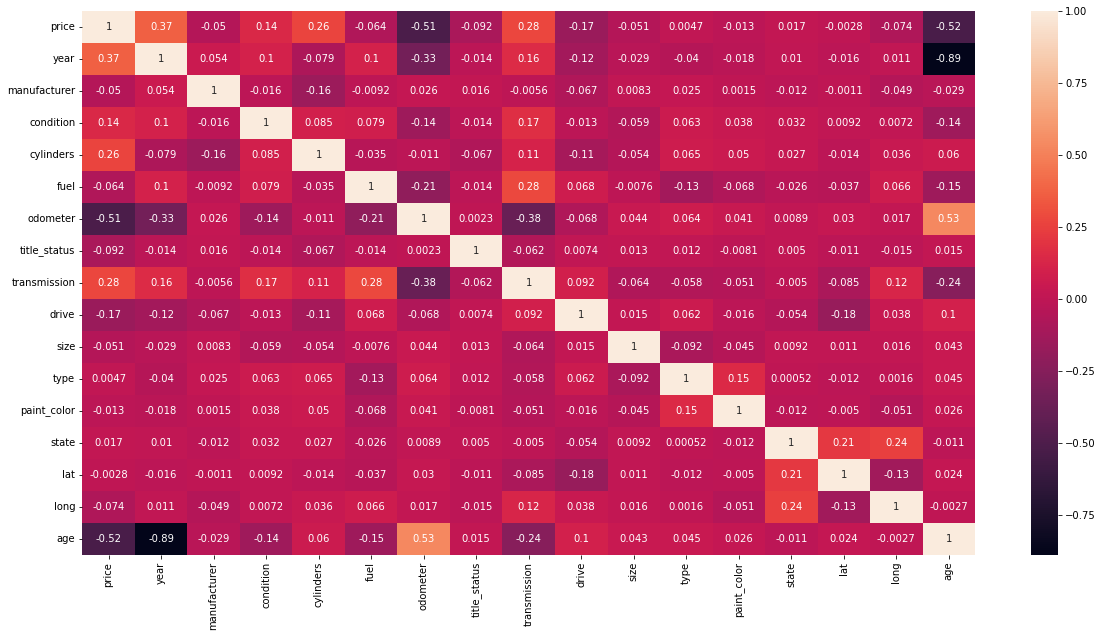

In [102]:
sns.heatmap(dataSet.corr() , annot=True )

In [ ]:
dataSet=dataSet.drop(columns=['model', 'posting_date' ,'make_model'], axis=1)
dataSet

In [105]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [106]:
# Printing the shpe of training and testing data
print('Shape of training dataset :',X_train.shape)
print('Shape of testing dataset :',X_test.shape)

Shape of training dataset : (249185, 16)
Shape of testing dataset : (122733, 16)


In [107]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [108]:
regressor=LinearRegression()
regressor.fit(X_train , y_train)


LinearRegression()

In [109]:
# accurancy score
print('Training data accurancy score :',regressor.score(X_train , y_train) )
print('Testing data accurancy score :',regressor.score(X_test,y_test) )

Training data accurancy score : 0.5078653707379073
Testing data accurancy score : 0.5085530164133879


In [110]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

In [111]:
# accurancy score
print(sgd.score(X_train, y_train))
print(sgd.score(X_test,y_test))

0.5069992247591324
0.5076121947385973


In [112]:
RF_regressor = RandomForestRegressor(n_estimators=20, random_state=0)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [113]:
# accurancy score
print(RF_regressor.score(X_train, y_train))
print(RF_regressor.score(X_test,y_test))

0.9795335055940445
0.876060167752452


In [114]:
# model building
ridge_regressor = RidgeCV() 
ridge_regressor.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [115]:
# accurancy score
print(ridge_regressor.score(X_train, y_train))
print(ridge_regressor.score(X_test,y_test))

0.507865363804721
0.5085534745543181


In [116]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [117]:
# accurancy score
print(decision_tree.score(X_train, y_train))
print(decision_tree.score(X_test,y_test))

0.9997389650341709
0.7710945440024393


In [118]:
# predection 
y_pred=RF_regressor.predict(X_test)

In [119]:
# Regression results
data_fin=Y_actual.assign(Y_predicted=y_pred)
data_fin

,Y_actual,Y_predicted
0,24990,24990.0000
1,10980,11515.7000
2,10500,9788.7500
3,54969,54969.0000
4,16995,16618.9500
...,...,...
122728,59125,59125.0000
122729,2999,5087.7375
122730,10999,11750.2000
122731,622,6439.1500


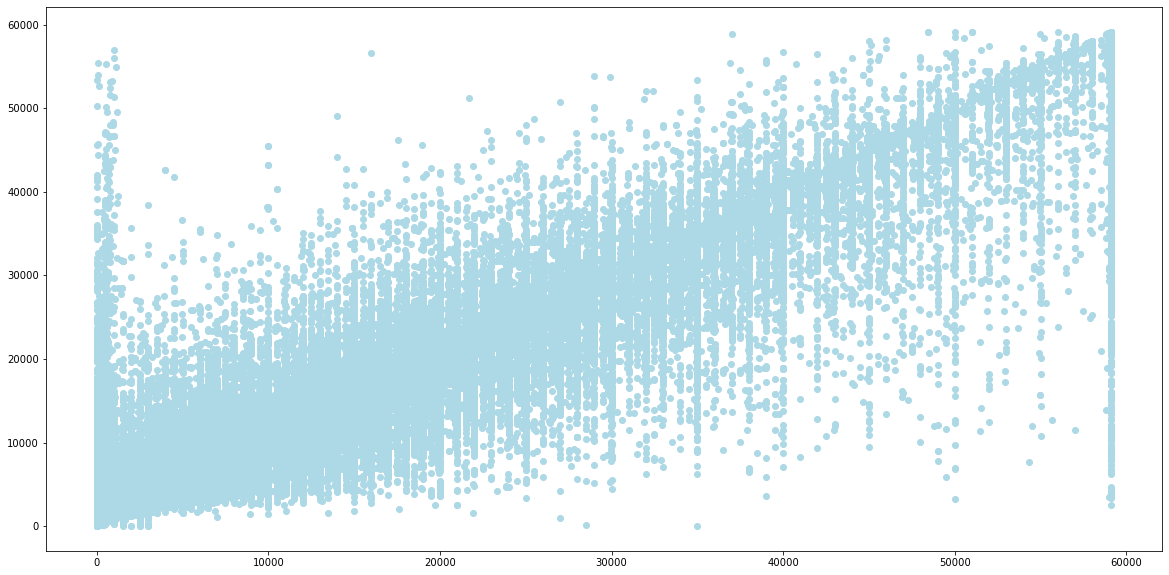

In [120]:
plt.scatter(y_test,y_pred,c='lightblue')

<AxesSubplot:>

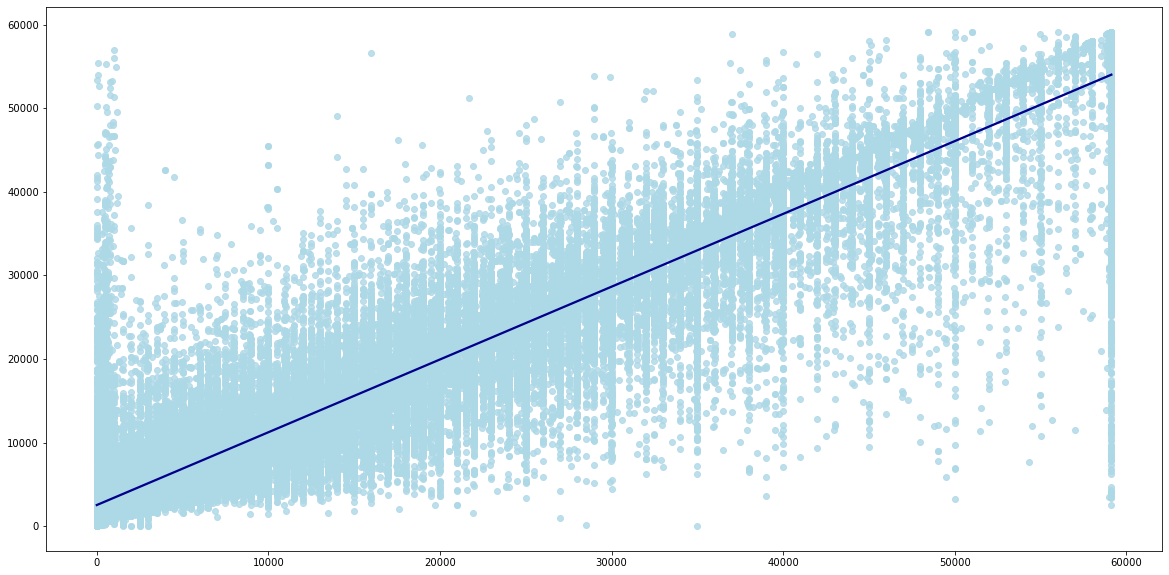

In [121]:
sns.regplot(y_test,y_pred , scatter_kws={'color':'lightblue'} , line_kws={'color':'darkblue'})

In [122]:
#Cost function evaluation (Errors) 

print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('Median Absolute Error :',median_absolute_error(y_test,y_pred))
print('Mean Squared Error :',mean_squared_error(y_test,y_pred))

Mean Absolute Error : 2455.698526452918
Median Absolute Error : 974.1999999999998
Mean Squared Error : 23905395.242098194
